In [216]:
import datetime 

import pandas as pd
import numpy as np
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [217]:
# ÏãúÍ∞ÅÌôî ÌÖåÎßà ÏÑ§Ï†ï
sns.set_style('dark')
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [218]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [219]:
# ÏÉâÏÉÅ ÏΩîÎìú ÏßÄÏ†ï
green_code = ['#228B22', '#64ae64']
blue_code = ['#688BB3', '#8AB9CE']

In [220]:
sns.set_palette('pastel')

In [221]:
# ÏùºÏûêÎ≥Ñ Ï§ëÏãùÍ≥Ñ, ÏÑùÏãùÍ≥ÑÎ•º ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†ú(Ï†ïÎãµ Ïó¥Ïù¥ 2Í∞ú)
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')
holiday = pd.read_csv('data/holiday.csv')

# Í∏∞Î≥∏ EDA

In [222]:
# shape
# Îç∞Ïù¥ÌÑ∞ ÏûêÏ≤¥Îäî Îß§Ïö∞ ÏûëÏùå
# ÌîºÏ≥ê ÏÉùÏÑ±ÏùÑ Ïñ¥ÎñªÍ≤å ÌïòÎäêÎÉêÍ∞Ä Ï§ëÏöîÌï† ÎìØ
print('train set : ', train.shape, ' test set : ', test.shape, ' submission : ', submission.shape)

train set :  (1205, 12)  test set :  (50, 10)  submission :  (50, 3)


In [223]:
# head
# Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú ÌååÏïÖ
display(train.head(1))
display(test.head(1))
display(submission.head(1))

ÏùºÏûê ÏöîÏùº  Î≥∏ÏÇ¨Ï†ïÏõêÏàò  Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò  Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò  Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò  ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò  \
0  2016-02-01  Ïõî   2601      50     150             238          0.0   

                                                Ï°∞ÏãùÎ©îÎâ¥  \
0  Î™®ÎãùÎ°§/Ï∞êÎπµ  Ïö∞Ïú†/ÎëêÏú†/Ï£ºÏä§ Í≥ÑÎûÄÌõÑÎùºÏù¥  Ìò∏ÎëêÏ£Ω/ÏåÄÎ∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) ÎêúÏû•Ï∞åÍ∞ú  Ï•ê...   

                                                Ï§ëÏãùÎ©îÎâ¥  \
0  ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) Ïò§ÏßïÏñ¥Ï∞åÍ∞ú  Ïá†Î∂àÍ≥†Í∏∞ (Ïá†Í≥†Í∏∞:Ìò∏Ï£ºÏÇ∞) Í≥ÑÎûÄÏ∞ú ...   

                                                ÏÑùÏãùÎ©îÎâ¥     Ï§ëÏãùÍ≥Ñ    ÏÑùÏãùÍ≥Ñ  
0  ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) Ïú°Í∞úÏû•  ÏûêÎ∞òÍ≥†Îì±Ïñ¥Íµ¨Ïù¥  ÎëêÎ∂ÄÏ°∞Î¶º  Í±¥ÌååÎûòÎ¨¥Ïπ® ...  1039.0  331.0

ÏùºÏûê ÏöîÏùº  Î≥∏ÏÇ¨Ï†ïÏõêÏàò  Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò  Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò  Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò  ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò  \
0  2021-01-27  Ïàò   2983      88     182               5        358.0   

                                                Ï°∞ÏãùÎ©îÎâ¥  \
0  Î™®ÎãùÎ°§/Ïó∞Ïú†Î≤ÑÌÑ∞Î≤†Ïù¥Í∏Ä Ïö∞Ïú†/Ï£ºÏä§ Í≥ÑÎûÄÌõÑÎùºÏù¥/Ï∞êÍ≥ÑÎûÄ Îã®Ìò∏Î∞ïÏ£Ω/ÌùëÎØ∏Î∞• Ïö∞Í±∞ÏßÄÍµ≠ Í≥†Í∏∞ÏôÑÏûê...   

                                                Ï§ëÏãùÎ©îÎâ¥  \
0  ÏåÄÎ∞•/ÌùëÎØ∏Î∞•/Ï∞∞ÌòÑÎØ∏Î∞• ÎåÄÍµ¨ÏßÄÎ¶¨ Îß§Ïö¥ÎèàÍ∞àÎπÑÏ∞ú Ïò§Íº¨ÎÖ∏ÎØ∏Í≥ÑÎûÄÎßêÏù¥ ÏÉÅÏ∂îÎ¨¥Ïπ® Ìè¨Í∏∞ÍπÄÏπò ÏñëÏÉÅÏ∂î...   

                                            ÏÑùÏãùÎ©îÎâ¥  
0  ÌùëÎØ∏Î∞• ÏñºÌÅ∞ÏàúÎëêÎ∂ÄÏ∞åÍ∞ú Ïá†Í≥†Í∏∞Ïö∞ÏóâÎ≥∂Ïùå Î≤ÑÏÑØÌñÑÎ≥∂Ïùå (New)ÏïÑÏÇ≠Ïù¥Í≥†Ï∂îÎ¨¥Ï†àÏûÑ Ìè¨Í∏∞ÍπÄÏπò

ÏùºÏûê  Ï§ëÏãùÍ≥Ñ  ÏÑùÏãùÍ≥Ñ
0  2021-01-27    0    0

In [224]:
# info - null Í∞í, dtype, Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ Îì± ÌååÏïÖÏïÖ
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ÏùºÏûê              1205 non-null   object 
 1   ÏöîÏùº              1205 non-null   object 
 2   Î≥∏ÏÇ¨Ï†ïÏõêÏàò           1205 non-null   int64  
 3   Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò          1205 non-null   int64  
 4   Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò          1205 non-null   int64  
 5   Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò  1205 non-null   int64  
 6   ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò     1205 non-null   float64
 7   Ï°∞ÏãùÎ©îÎâ¥            1205 non-null   object 
 8   Ï§ëÏãùÎ©îÎâ¥            1205 non-null   object 
 9   ÏÑùÏãùÎ©îÎâ¥            1205 non-null   object 
 10  Ï§ëÏãùÍ≥Ñ             1205 non-null   float64
 11  ÏÑùÏãùÍ≥Ñ             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [225]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏ - Í≤∞Ï∏°Ïπò ÏóÜÏùå
train.isnull().sum()
# test.isnull().sum()

ÏùºÏûê                0
ÏöîÏùº                0
Î≥∏ÏÇ¨Ï†ïÏõêÏàò             0
Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò            0
Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò            0
Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò    0
ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò       0
Ï°∞ÏãùÎ©îÎâ¥              0
Ï§ëÏãùÎ©îÎâ¥              0
ÏÑùÏãùÎ©îÎâ¥              0
Ï§ëÏãùÍ≥Ñ               0
ÏÑùÏãùÍ≥Ñ               0
dtype: int64

In [226]:
# Ï§ëÎ≥µÍ∞í ÌôïÏù∏
train.duplicated().sum()
# test.duplicated().sum()

0

In [227]:
# Í∏∞Ïà†ÌÜµÍ≥Ñ
# Í≤∞Ï∏°Í∞í, Í≥†Ïú†Í∞í, Ïù¥ÏÉÅÏπò, Ï§ëÎ≥µ Îì± ÎåÄÎûµÏ†ÅÏúºÎ°ú ÌôïÏù∏
# Ìú¥Í∞ÄÏûêÏàò, ÏïºÍ∑ºÍ±¥Ïàò, Ïû¨ÌÉùÍ∑ºÎ¨¥ min, max Ï∞®Ïù¥Í∞Ä ÍΩ§ ÌÅº -> ÏãúÍ∞ÅÌôîÌï¥ÏÑú ÌôïÏù∏
train.describe()

Î≥∏ÏÇ¨Ï†ïÏõêÏàò       Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò       Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò  Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò  ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò  \
count  1205.000000  1205.000000  1205.000000     1205.000000  1205.000000   
mean   2807.815768   157.913693   241.142739      274.117012    43.506224   
std     171.264404   144.190572    43.532298      246.239651   109.937400   
min    2601.000000    23.000000    41.000000        0.000000     0.000000   
25%    2645.000000    71.000000   217.000000        4.000000     0.000000   
50%    2760.000000   105.000000   245.000000      299.000000     0.000000   
75%    2962.000000   185.000000   272.000000      452.000000     0.000000   
max    3305.000000  1224.000000   378.000000     1044.000000   533.000000   

               Ï§ëÏãùÍ≥Ñ          ÏÑùÏãùÍ≥Ñ  
count  1205.000000  1205.000000  
mean    890.334440   461.772614  
std     209.505057   139.179202  
min     296.000000     0.000000  
25%     758.000000   406.000000  
50%     879.000000   483.000000  
75%    1032.000000   545.000000  
max    1459.000000   905.000000

In [228]:
# Í≤πÏπòÎäî Î©îÎâ¥Îäî ÏûàÏùå, Ï°∞¬∑Ï§ëÏãùÏùÄ ÎëêÍ∞ú, ÏÑùÏãùÏùÄ 19Í∞ú
train.describe(include = 'O')

ÏùºÏûê    ÏöîÏùº                                               Ï°∞ÏãùÎ©îÎâ¥  \
count         1205  1205                                               1205   
unique        1205     5                                               1204   
top     2016-02-01     Î™©  Î™®ÎãùÎ°§/ÌîÑÎ†åÏπòÌÜ†Ïä§Ìä∏  Ïö∞Ïú†/Ï£ºÏä§ Í≥ÑÎûÄÌõÑÎùºÏù¥ ÎàÑÎ£ΩÏßÄÌÉï/ÏåÄÎ∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Î¨¥Ï±ÑÍµ≠  ÍπÄ...   
freq             1   244                                                  2   

                                                     Ï§ëÏãùÎ©îÎâ¥           ÏÑùÏãùÎ©îÎâ¥  
count                                                1205           1205  
unique                                               1198           1168  
top     ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) ÏãúÍ∏àÏπòÎêúÏû•Íµ≠  ÌõàÏ†úÏò§Î¶¨Íµ¨Ïù¥  Ïã§Í≥§ÏïΩÎ¨¥Ïπ®  Î¨¥Ïåà/ÏñëÌååÏ†àÏûÑ ...      *          
freq                                                    2             19

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## ÎØ∏ÏÇ¨Ïö© Îç∞Ïù¥ÌÑ∞ Ï†úÏô∏

In [229]:
# Ï°∞ÏãùÎ©îÎâ¥ Ï†úÏô∏
train.drop('Ï°∞ÏãùÎ©îÎâ¥', axis = 1, inplace = True)
test.drop('Ï°∞ÏãùÎ©îÎâ¥', axis = 1, inplace = True)

## ÏÉàÎ°úÏö¥ ÌîºÏ≤ò ÏÉùÏÑ±

In [230]:
# ÎØ∏Ï∂úÍ∑ºÏûêÏàò ÌîºÏ≤ò ÏÉùÏÑ±
train['ÎØ∏Ï∂úÍ∑ºÏûêÏàò'] = train['Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò'] + train['Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò'] + train['ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò']
test['ÎØ∏Ï∂úÍ∑ºÏûêÏàò'] = test['Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò'] + test['Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò'] + test['ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò']

In [231]:
# Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò ÌîºÏ≤ò ÏÉùÏÑ±
train['Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò'] = train['Î≥∏ÏÇ¨Ï†ïÏõêÏàò'] - train['ÎØ∏Ï∂úÍ∑ºÏûêÏàò']
test['Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò'] = test['Î≥∏ÏÇ¨Ï†ïÏõêÏàò'] - test['ÎØ∏Ï∂úÍ∑ºÏûêÏàò']

In [232]:
# Í∑ºÎ¨¥Ïûê ÎåÄÎπÑ ÏãùÏÇ¨ Ïù¥Ïö©Î•†
train['Ï§ëÏãùÏù¥Ïö©Î•†'] = train['Ï§ëÏãùÍ≥Ñ']/train['Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò'] * 100
train['ÏÑùÏãùÏù¥Ïö©Î•†'] = train['ÏÑùÏãùÍ≥Ñ']/train['Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò'] * 100
train['Ï§ëÏãùÎåÄÎπÑÏÑùÏãùÏù¥Ïö©Î•†'] = train['ÏÑùÏãùÍ≥Ñ']/train['Ï§ëÏãùÍ≥Ñ'] * 100

In [233]:
# ÎÇ†ÏßúÎç∞Ïù¥ÌÑ∞ ÌòïÏãù ÏàòÏ†ï Î∞è ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±
train['ÏùºÏûê'] = pd.to_datetime(train['ÏùºÏûê'])
train['ÎÖÑ'] = train['ÏùºÏûê'].dt.year
train['Ïõî'] = train['ÏùºÏûê'].dt.month
train['Ïùº'] = train['ÏùºÏûê'].dt.day
train['Ï£º'] = train['ÏùºÏûê'].dt.week
train['ÎÖÑÏõî'] = train['ÏùºÏûê'].astype(str).str[:7]

test['ÏùºÏûê'] = pd.to_datetime(test['ÏùºÏûê'])
test['ÎÖÑ'] = test['ÏùºÏûê'].dt.year
test['Ïõî'] = test['ÏùºÏûê'].dt.month
test['Ïùº'] = test['ÏùºÏûê'].dt.day
test['Ï£º'] = test['ÏùºÏûê'].dt.week
test['ÎÖÑÏõî'] = test['ÏùºÏûê'].astype(str).str[:7]

/var/folders/h1/qk7q5tvs4f55rk_cpsw0m2880000gn/T/ipykernel_57758/1540700747.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['Ï£º'] = train['ÏùºÏûê'].dt.week
/var/folders/h1/qk7q5tvs4f55rk_cpsw0m2880000gn/T/ipykernel_57758/1540700747.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test['Ï£º'] = test['ÏùºÏûê'].dt.week


## Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨

##### ÏÑùÏãùÎ©îÎâ¥ Ïù¥ÏÉÅÏπò

In [234]:
# 1. ÏÑùÏãùÎ©îÎâ¥ Îç∞Ïù¥ÌÑ∞ Ï§ë ÏùåÏãùÎ©îÎâ¥Í∞Ä ÏïÑÎãå Îç∞Ïù¥ÌÑ∞ Í∞í
train[train['ÏÑùÏãùÎ©îÎâ¥'].str.len() < 25]['ÏÑùÏãùÎ©îÎâ¥'].value_counts()

    *                   19
                         4
    ÏûêÍ∏∞Í≥ÑÎ∞úÏùòÎÇ†               3
    ÏûêÍ∏∞Í∞úÎ∞úÏùòÎÇ†               3
     *                   2
      *                  2
    *  ÏûêÍ∏∞Í≥ÑÎ∞úÏùòÎÇ†  *         2
    *  ÏûêÍ∏∞Í∞úÎ∞úÏùòÎÇ†  *         2
      ÏûêÍ∏∞Í≥ÑÎ∞úÏùòÎÇ†             1
      *ÏûêÍ∏∞Í≥ÑÎ∞úÏùòÎÇ†*           1
      Í∞ÄÏ†ïÏùòÎÇ†               1
   *  ÏûêÍ∏∞Í∞úÎ∞úÏùòÎÇ†  *          1
 ÔºúÏûêÍ∏∞ Í≥ÑÎ∞úÏùò ÎÇ†Ôºû              1
Name: ÏÑùÏãùÎ©îÎâ¥, dtype: int64

In [235]:
# ÏúÑ Í∞íÏùÑ Î™®Îëê None Ï≤òÎ¶¨
train.loc[train['ÏÑùÏãùÎ©îÎâ¥'].str.len() < 25, 'ÏÑùÏãùÎ©îÎâ¥'] = None

##### ÏÑùÏãùÍ≥Ñ Ïù¥ÏÉÅÏπò

In [236]:
# 2. ÏÑùÏãùÍ≥ÑÍ∞Ä 0 Ïù∏ Îç∞Ïù¥ÌÑ∞ : 43 Í∞ú
print(train[train['ÏÑùÏãùÍ≥Ñ'] == 0].shape)

# Í∑∏ Ï§ë ÏÑùÏãùÎ©îÎâ¥Í∞Ä ÏûàÏúºÎ©¥ÏÑú 0Ïù∏ Îç∞Ïù¥ÌÑ∞
train[(train['ÏÑùÏãùÍ≥Ñ'] == 0) & pd.notna(train['ÏÑùÏãùÎ©îÎâ¥'])][['ÏùºÏûê', 'ÏÑùÏãùÎ©îÎâ¥', 'ÏÑùÏãùÍ≥Ñ']]

(43, 21)


ÏùºÏûê                                               ÏÑùÏãùÎ©îÎâ¥  ÏÑùÏãùÍ≥Ñ
410 2017-09-27  ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) ÎêúÏû•Ï∞åÍ∞ú  ÎØ∏ÎãàÌï®Î∞ïÏ°∞Î¶º  Í≥ÑÎûÄÎßêÏù¥  ÎπÑÎ¶ÑÎÇòÎ¨º  Ìè¨Í∏∞ÍπÄÏπò ...  0.0
502 2018-02-14  ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Ïá†Í≥†Í∏∞Î¨¥Íµ≠  Í≥†Ï∂îÏû°Ï±Ñ*ÍΩÉÎπµ  Í≥ÑÎûÄÏ∞ú  Ïò§Ïù¥Î¨¥Ïπ®  Ìè¨Í∏∞ÍπÄÏπò...  0.0

In [237]:
# ÏúÑ Í∞íÎèÑ Ï†ïÎãµÍ∞íÏù¥ 0Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê ÌïôÏäµÌï¥ÎèÑ Ïò§Ï∞®Îßå ÎäòÎ¶¥ Í≤É...?
# Î™®Îëê None Ï≤òÎ¶¨
train.loc[(train['ÏÑùÏãùÍ≥Ñ'] == 0) & pd.notna(train['ÏÑùÏãùÎ©îÎâ¥']), 'ÏÑùÏãùÎ©îÎâ¥'] = None

# EDA ÏãúÍ∞ÅÌôî

#### Ï†ÑÏ≤¥

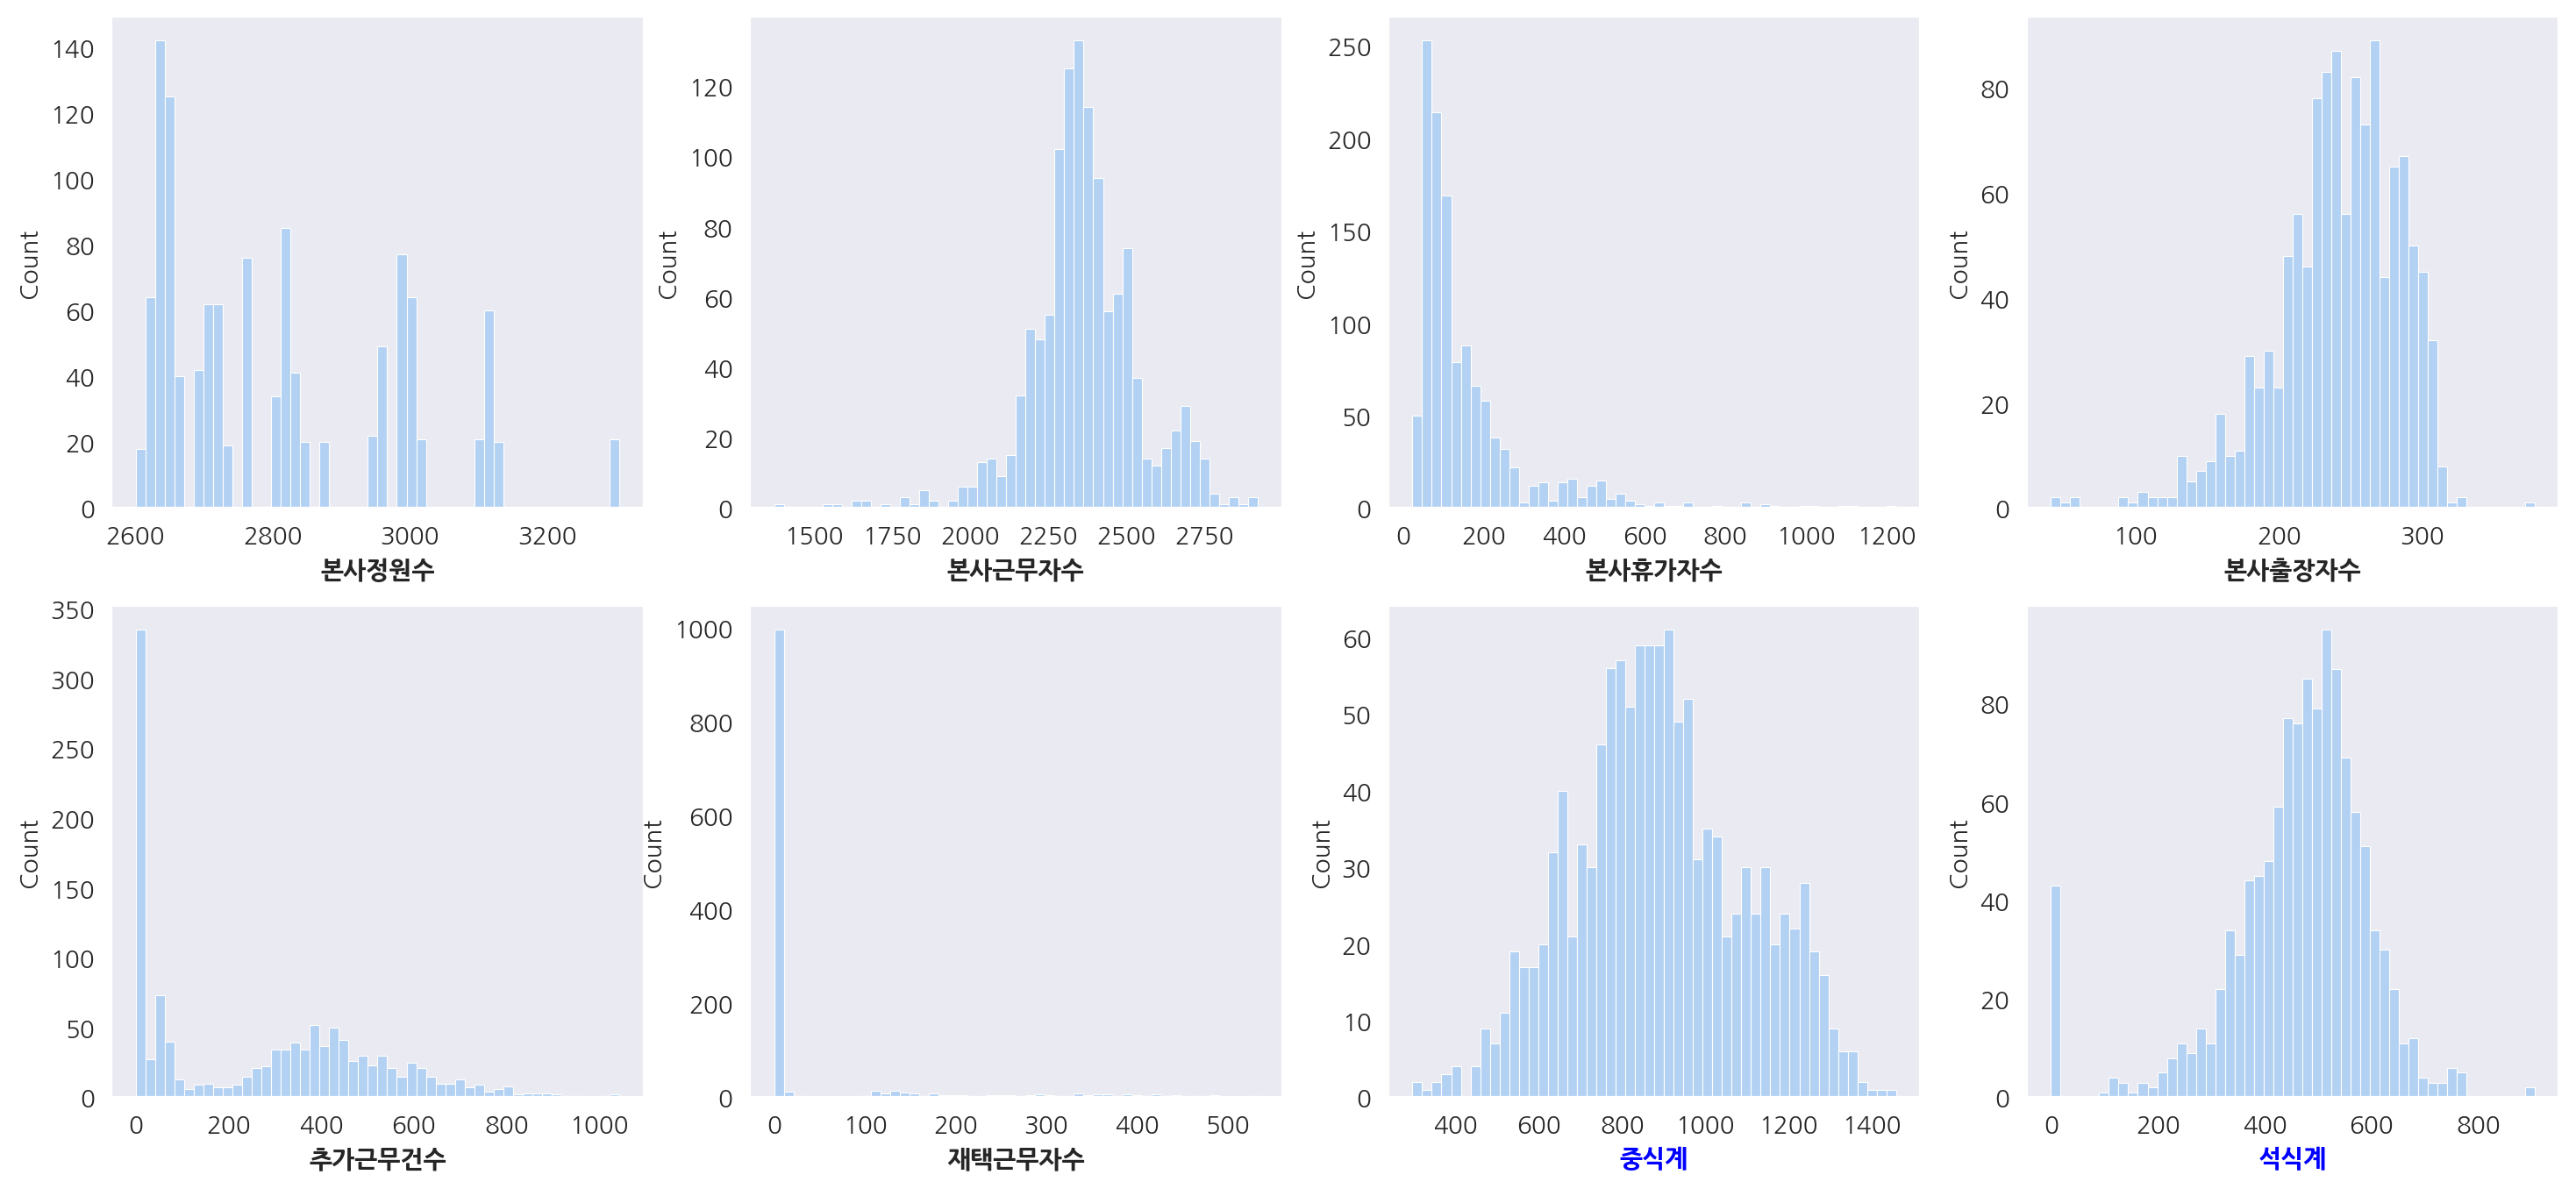

In [238]:
# Ïà´ÏûêÎç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
sns.histplot(train['Î≥∏ÏÇ¨Ï†ïÏõêÏàò'], ax=axes[0, 0], bins=50)
sns.histplot(train['Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò'], ax=axes[0, 1], bins=50)
sns.histplot(train['Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò'], ax=axes[0, 2], bins=50)
sns.histplot(train['Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò'], ax=axes[0, 3], bins=50)
sns.histplot(train['Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò'], ax=axes[1, 0], bins=50)
sns.histplot(train['ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò'], ax=axes[1, 1], bins=50)
sns.histplot(train['Ï§ëÏãùÍ≥Ñ'], ax=axes[1, 2], bins=50)
sns.histplot(train['ÏÑùÏãùÍ≥Ñ'], ax=axes[1, 3], bins=50)

axes[0,0].set_xlabel('Î≥∏ÏÇ¨Ï†ïÏõêÏàò', fontweight='bold')
axes[0,1].set_xlabel('Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò', fontweight='bold')
axes[0,2].set_xlabel('Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò', fontweight='bold')
axes[0,3].set_xlabel('Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò', fontweight='bold')
axes[1,0].set_xlabel('Ï∂îÍ∞ÄÍ∑ºÎ¨¥Í±¥Ïàò', fontweight='bold')
axes[1,1].set_xlabel('Ïû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò', fontweight='bold')
axes[1,2].set_xlabel('Ï§ëÏãùÍ≥Ñ', fontweight='bold', color='blue')
axes[1,3].set_xlabel('ÏÑùÏãùÍ≥Ñ', fontweight='bold', color='blue')


plt.subplots_adjust(hspace=0.2, wspace=0.2) #Í∞ÑÍ≤©

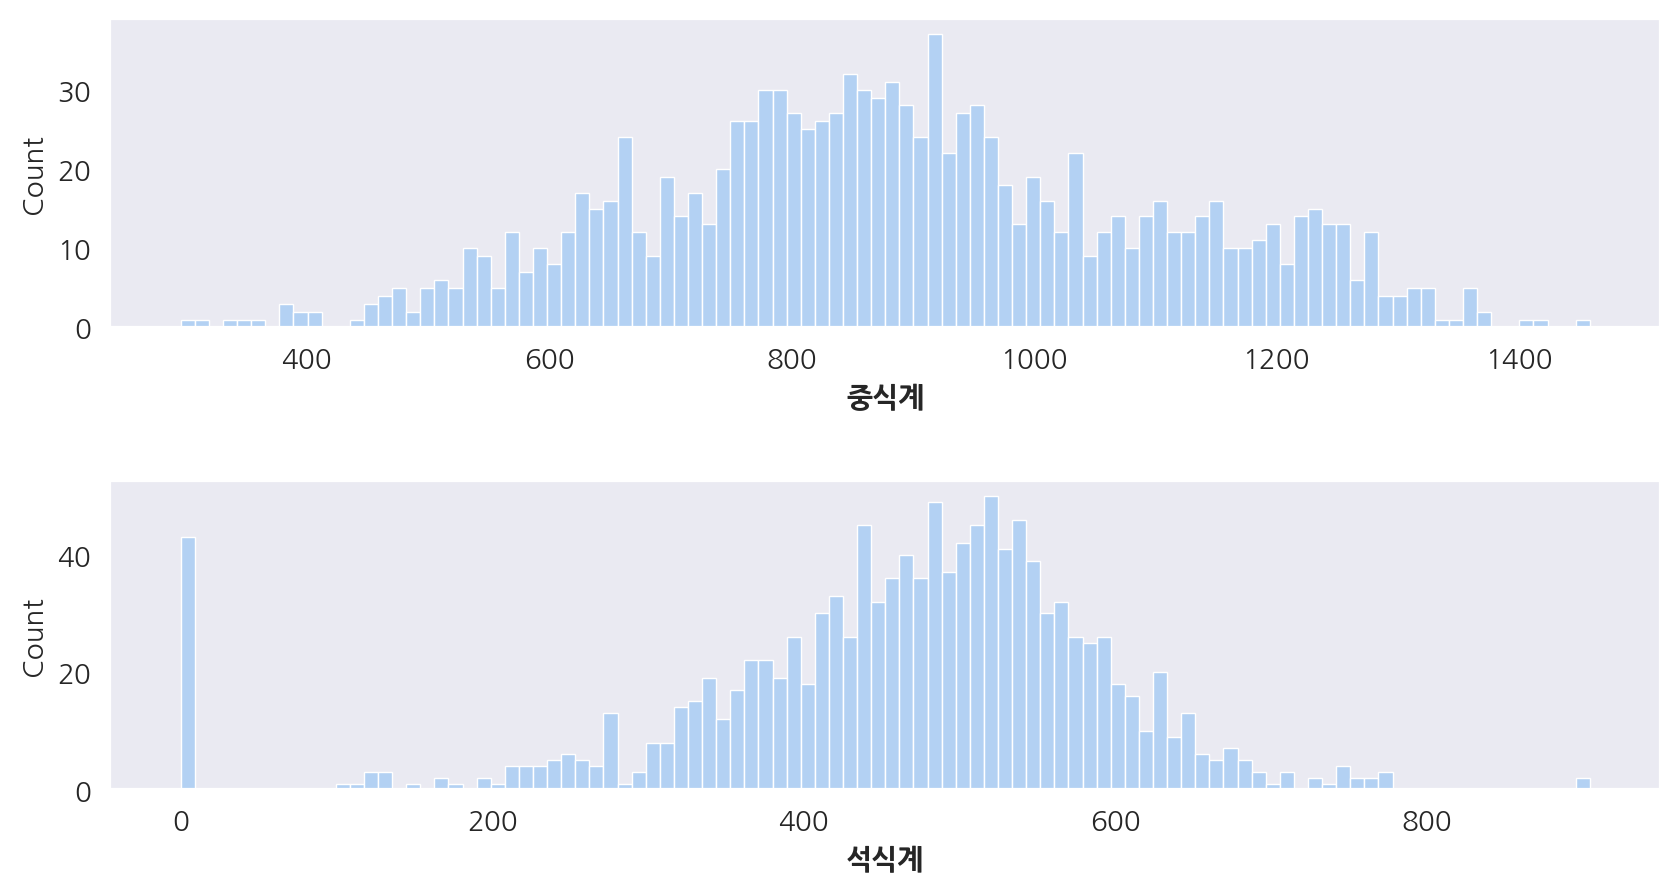

In [239]:
# ÌÉÄÍ≤üÎç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
sns.histplot(train['Ï§ëÏãùÍ≥Ñ'], ax=axes[0], bins=100)
sns.histplot(train['ÏÑùÏãùÍ≥Ñ'], ax=axes[1], bins=100)

axes[0].set_xlabel('Ï§ëÏãùÍ≥Ñ', fontweight='bold')
axes[1].set_xlabel('ÏÑùÏãùÍ≥Ñ', fontweight='bold')
plt.subplots_adjust(hspace=0.5, wspace=0.5) #Í∞ÑÍ≤©

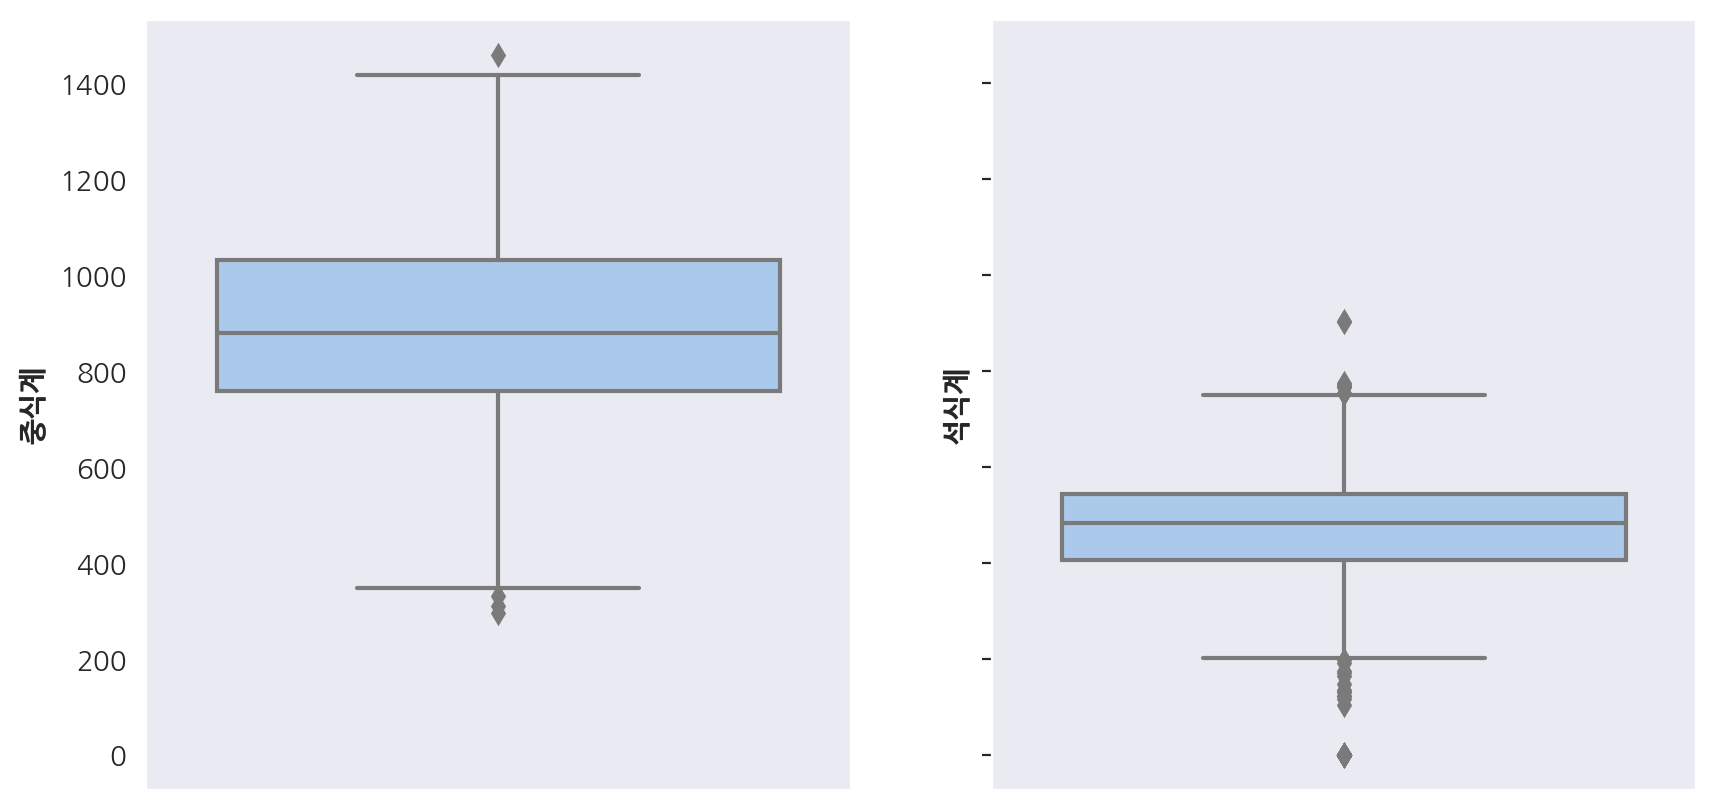

In [240]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

sns.boxplot(y=train['Ï§ëÏãùÍ≥Ñ'], data=train, ax=axes[0]);
sns.boxplot(y=train['ÏÑùÏãùÍ≥Ñ'], data=train, ax=axes[1]);

axes[0].set_ylabel('Ï§ëÏãùÍ≥Ñ', fontweight='bold')
axes[1].set_ylabel('ÏÑùÏãùÍ≥Ñ', fontweight='bold')

axes[1].yaxis.tick_left()

In [241]:
#Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ï§ëÏãùÍ≥ÑÎäî ÎπÑÍµêÏ†Å ÏàòÏπòÍ∞íÏù¥ ÏùºÏ†ïÌïòÎÇò, ÏÑùÏãùÏù¥ Q1 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞Í∞Ä ÎßéÎã§
fig = make_subplots(rows=1, cols=2, shared_yaxes= True)
fig.add_trace(go.Box(y=train['Ï§ëÏãùÍ≥Ñ'], name='Ï§ëÏãùÍ≥Ñ'), row=1, col=1)
fig.add_trace(go.Box(y=train['ÏÑùÏãùÍ≥Ñ'], name='ÏÑùÏãùÍ≥Ñ'), row=1, col=2)
fig.update_layout(height=500, width=800)

In [242]:
def outlier(train, column):
    median = train[column].median()
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr #1443.0
    lower_bound = q1 - 1.5 * iqr #347.0
    return train[(train[column] > upper_bound) | (train[column] < lower_bound)]

In [243]:
print(outlier(train, 'Ï§ëÏãùÍ≥Ñ').shape)
print(outlier(train, 'ÏÑùÏãùÍ≥Ñ').shape)

(4, 21)
(66, 21)


#### ÏùºÏûê Í¥ÄÎ†®

In [244]:
#ÎàÑÎùΩÎêú ÎÇ†Ïßú ÌôïÏù∏ 
#Î™®Îì† ÌèâÏùº Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞ 
start_d = datetime.date(2016,2,1)
end_d = datetime.date(2021,4,9)

dates = pd.date_range(start=start_d, end=end_d, freq='B')
notnull = pd.DataFrame({'ÏùºÏûê':dates})

In [245]:
all_week = pd.merge(notnull, train, how='left')
all_week['Ï£º'] = all_week['ÏùºÏûê'].dt.week
all_week['ÎÖÑ'] = all_week['ÏùºÏûê'].dt.year
all_week.head(1)

/var/folders/h1/qk7q5tvs4f55rk_cpsw0m2880000gn/T/ipykernel_57758/786975460.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



ÏùºÏûê ÏöîÏùº   Î≥∏ÏÇ¨Ï†ïÏõêÏàò  Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò  Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò  Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò  ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò  \
0 2016-02-01  Ïõî  2601.0    50.0   150.0           238.0          0.0   

                                                Ï§ëÏãùÎ©îÎâ¥  \
0  ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) Ïò§ÏßïÏñ¥Ï∞åÍ∞ú  Ïá†Î∂àÍ≥†Í∏∞ (Ïá†Í≥†Í∏∞:Ìò∏Ï£ºÏÇ∞) Í≥ÑÎûÄÏ∞ú ...   

                                                ÏÑùÏãùÎ©îÎâ¥     Ï§ëÏãùÍ≥Ñ  ...  ÎØ∏Ï∂úÍ∑ºÏûêÏàò  \
0  ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) Ïú°Í∞úÏû•  ÏûêÎ∞òÍ≥†Îì±Ïñ¥Íµ¨Ïù¥  ÎëêÎ∂ÄÏ°∞Î¶º  Í±¥ÌååÎûòÎ¨¥Ïπ® ...  1039.0  ...  200.0   

   Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò      Ï§ëÏãùÏù¥Ïö©Î•†      ÏÑùÏãùÏù¥Ïö©Î•†  Ï§ëÏãùÎåÄÎπÑÏÑùÏãùÏù¥Ïö©Î•†     ÎÖÑ    Ïõî    Ïùº  Ï£º       ÎÖÑÏõî  
0  2401.0  43.273636  13.785923  31.857555  2016  2.0  1.0  5  2016-02  

[1 rows x 21 columns]

In [246]:
temp = pd.melt(all_week[all_week['ÎÖÑ']==2018], id_vars=['Ï£º'], value_vars=['Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ'], var_name='ÏãùÍ≥Ñ', value_name='ÌèâÍ∑†Í∞í')
temp[temp['Ï£º']==39]

Ï£º   ÏãùÍ≥Ñ  ÌèâÍ∑†Í∞í
190  39  Ï§ëÏãùÍ≥Ñ  NaN
191  39  Ï§ëÏãùÍ≥Ñ  NaN
192  39  Ï§ëÏãùÍ≥Ñ  NaN
193  39  Ï§ëÏãùÍ≥Ñ  NaN
194  39  Ï§ëÏãùÍ≥Ñ  NaN
451  39  ÏÑùÏãùÍ≥Ñ  NaN
452  39  ÏÑùÏãùÍ≥Ñ  NaN
453  39  ÏÑùÏãùÍ≥Ñ  NaN
454  39  ÏÑùÏãùÍ≥Ñ  NaN
455  39  ÏÑùÏãùÍ≥Ñ  NaN

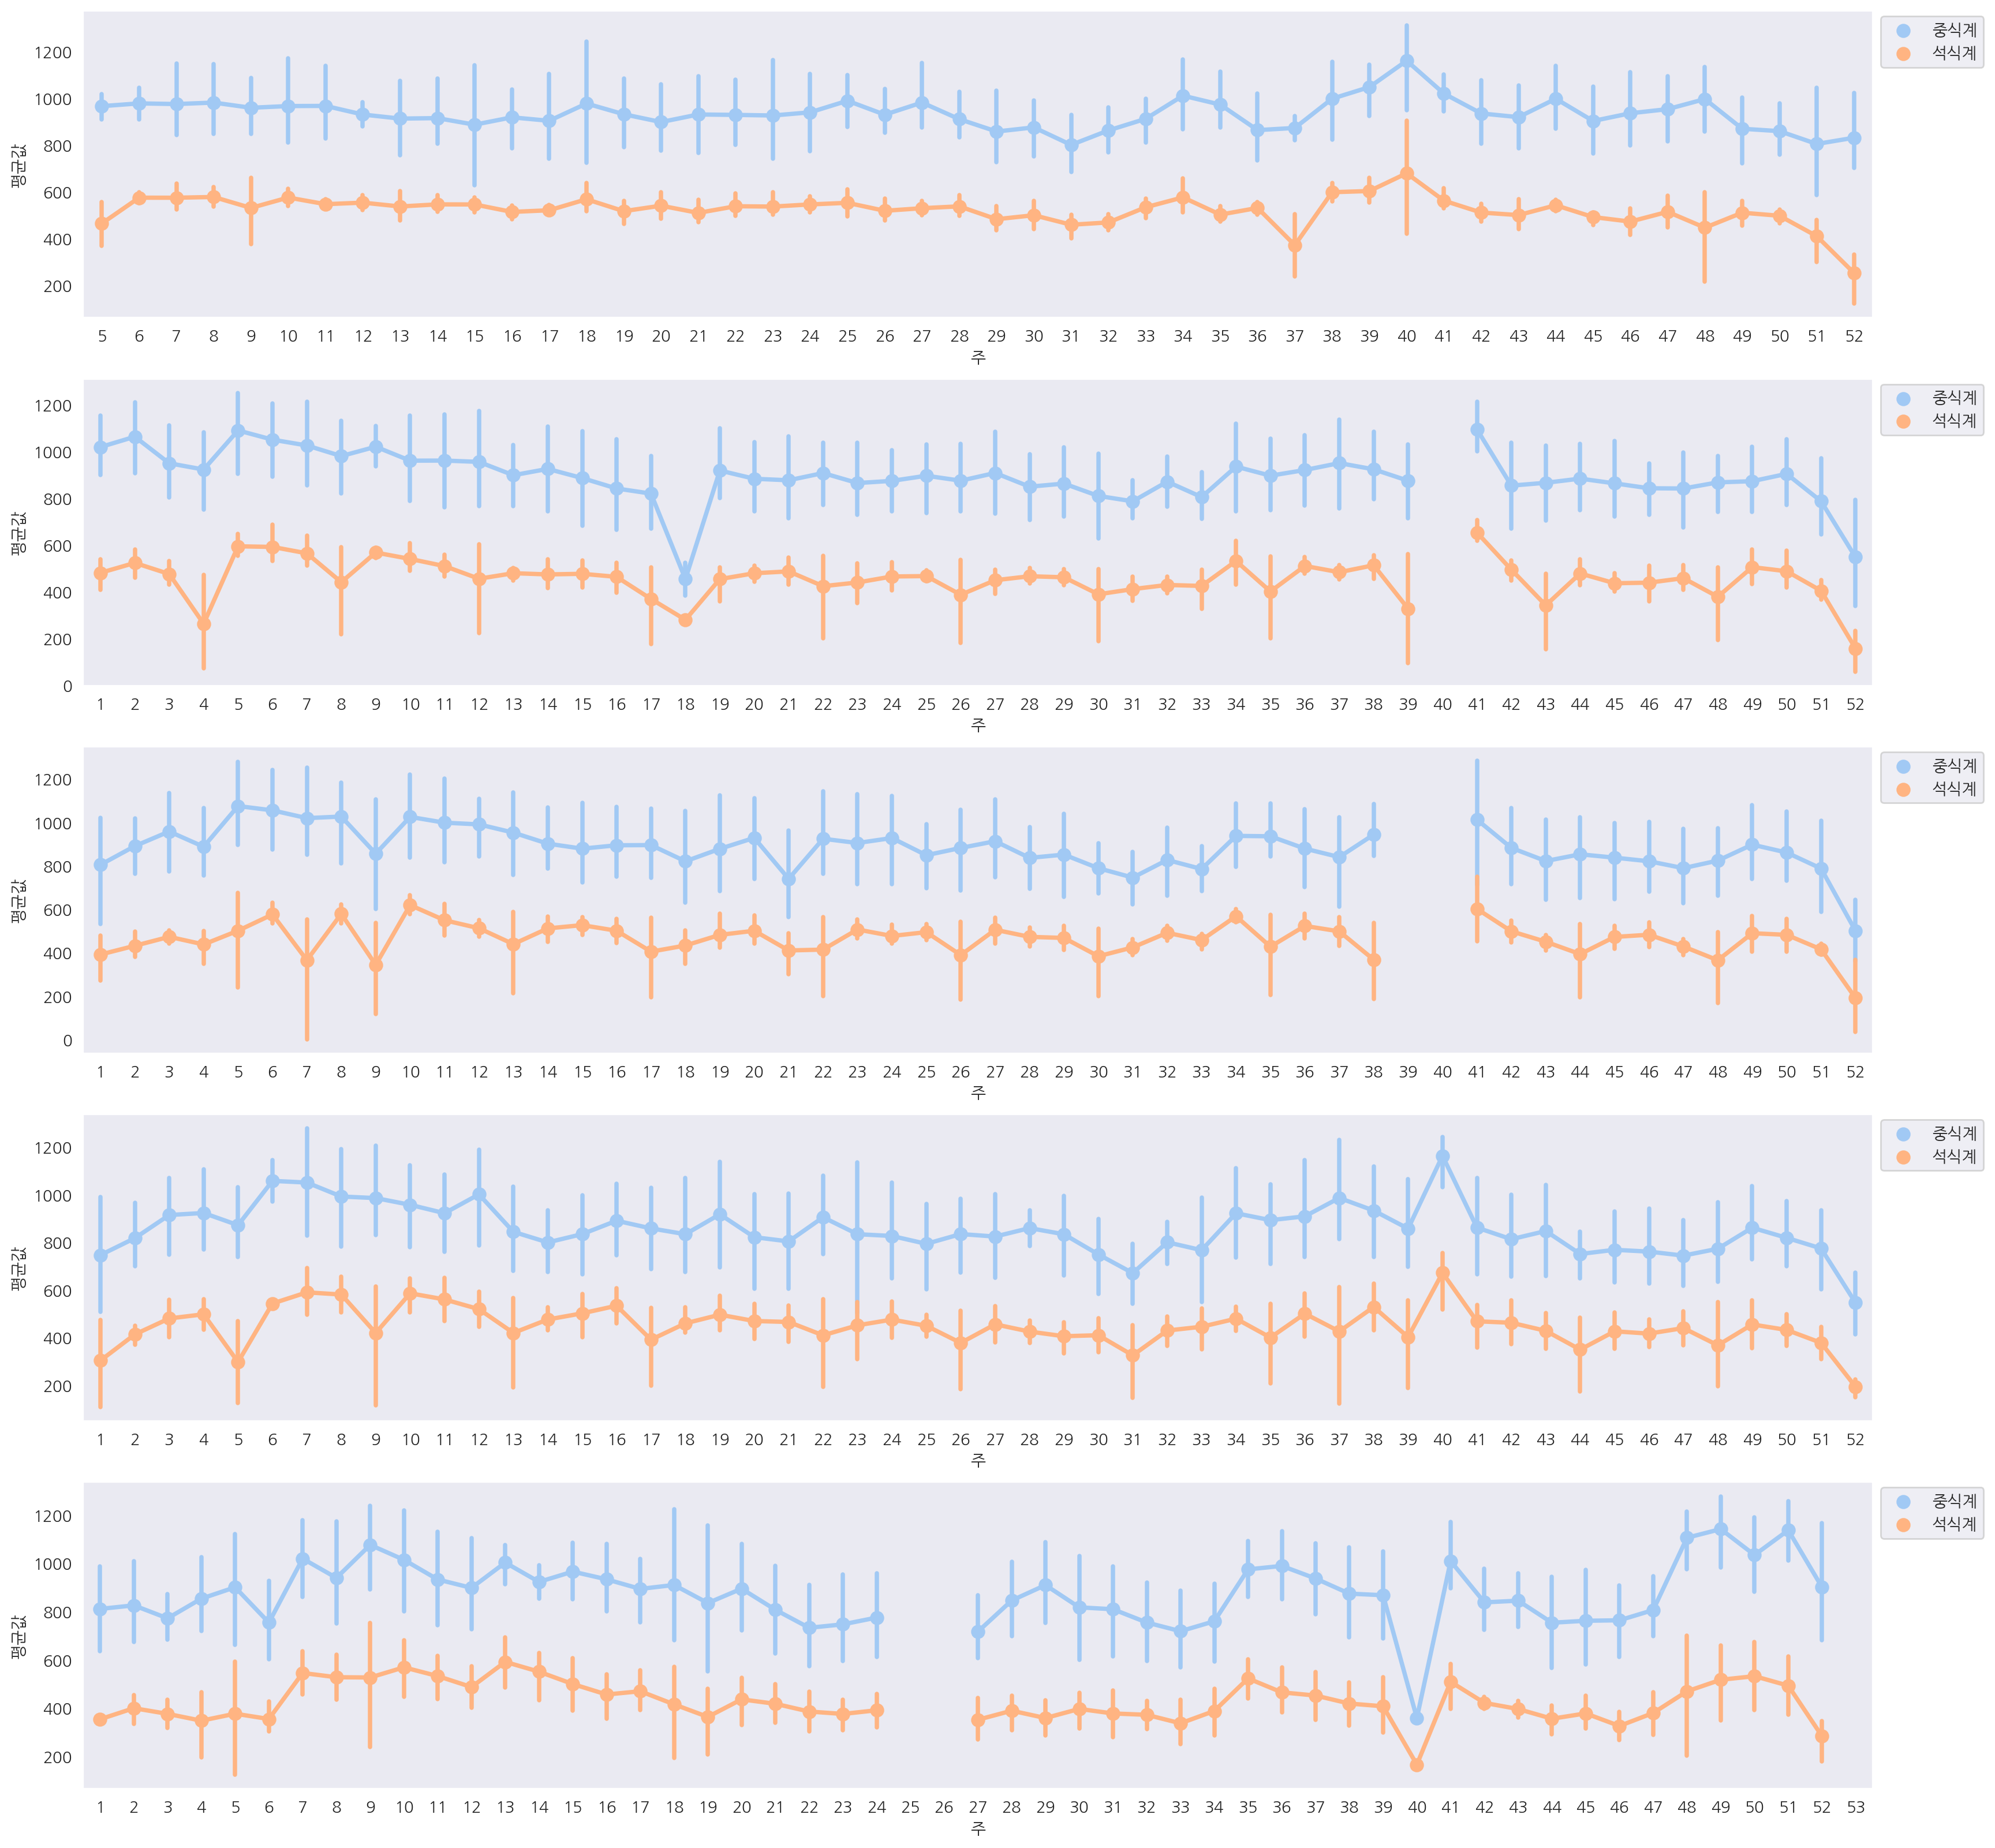

In [247]:
#Ï†ÑÏ≤¥ Ï∂îÏù¥ 
import warnings
warnings.filterwarnings('ignore', message='Mean of empty slice')
warnings.filterwarnings('ignore', message='All-NaN slice encountered')

year = [2016, 2017, 2018, 2019, 2020]
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 20))
for i,idx in enumerate(year):
    melted_train = pd.melt(all_week[all_week['ÎÖÑ']==idx], id_vars=['Ï£º'], value_vars=['Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ'], var_name='ÏãùÍ≥Ñ', value_name='ÌèâÍ∑†Í∞í')
    sns.pointplot(data=melted_train, x='Ï£º', y='ÌèâÍ∑†Í∞í', hue='ÏãùÍ≥Ñ', ax=axes[i])

axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.9))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.9))
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.9))
axes[3].legend(loc='center left', bbox_to_anchor=(1, 0.9))
axes[4].legend(loc='center left', bbox_to_anchor=(1, 0.9))

plt.subplots_adjust(hspace=0.2, wspace=0.5)

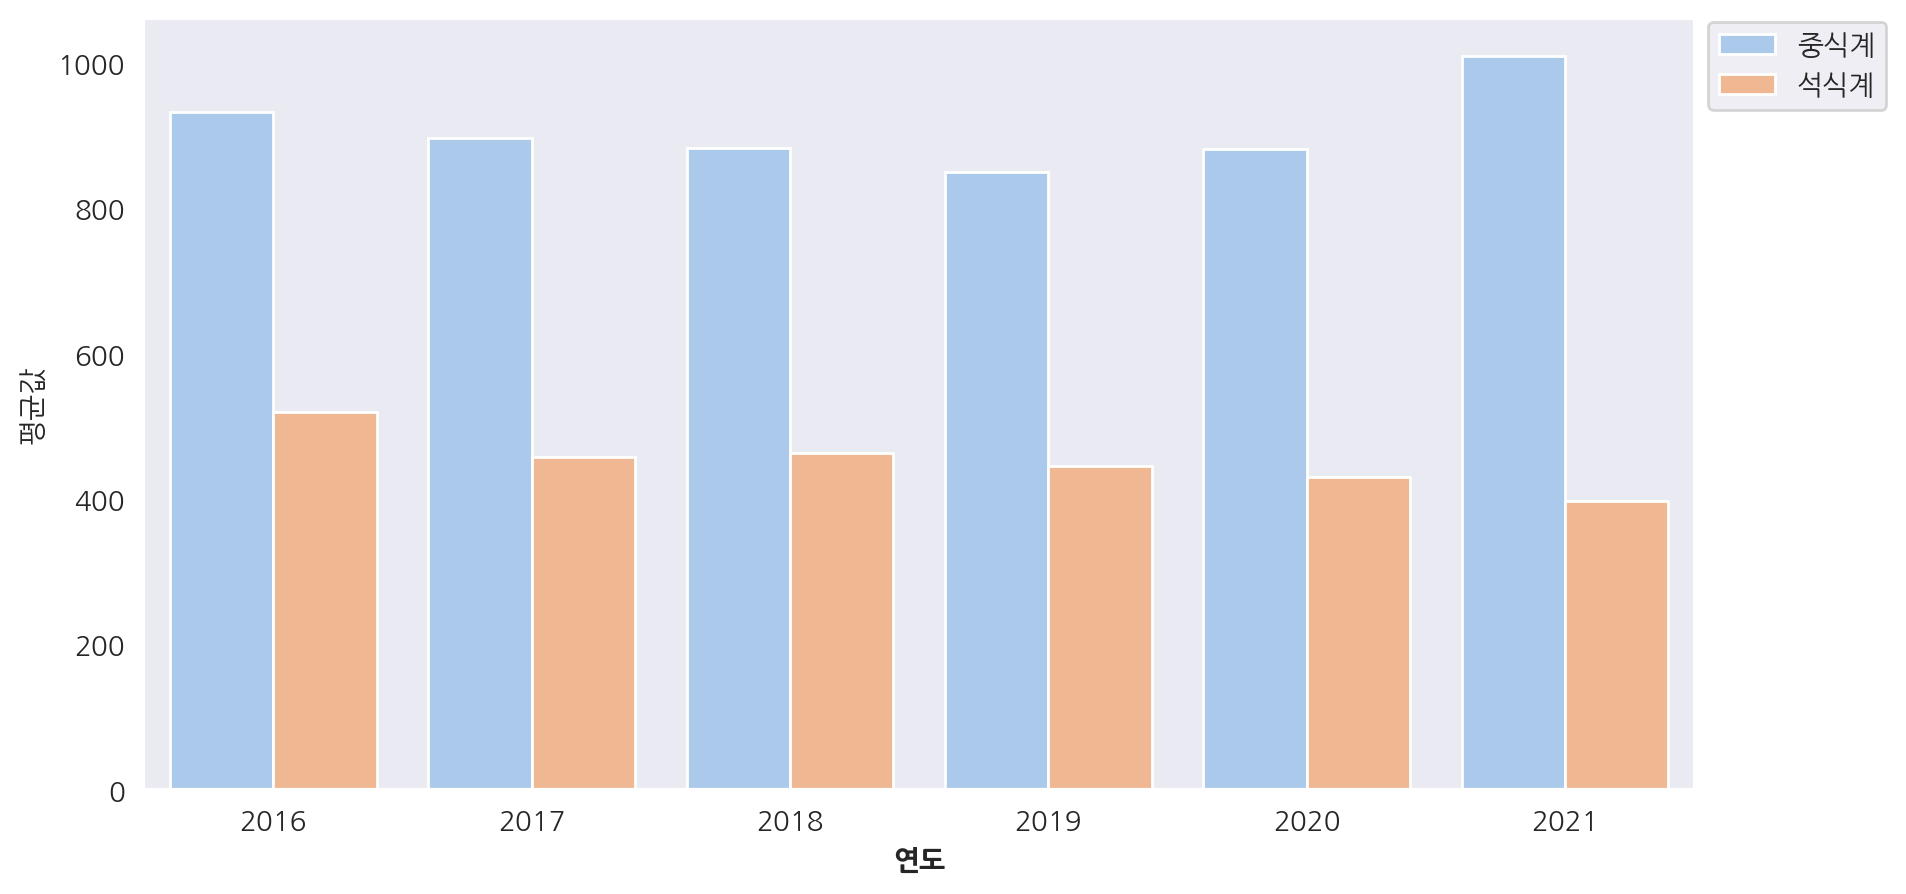

In [248]:
# ÎÖÑÎèÑÎ≥Ñ Ï∂îÏù¥
melted_train = pd.melt(train, id_vars=['ÎÖÑ'], value_vars=['Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ'], var_name='ÏãùÍ≥Ñ', value_name='ÌèâÍ∑†Í∞í')
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=melted_train, x='ÎÖÑ', y='ÌèâÍ∑†Í∞í', hue='ÏãùÍ≥Ñ', errorbar=None)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.94))
ax.set_xlabel('Ïó∞ÎèÑ', fontweight='bold')
plt.show()

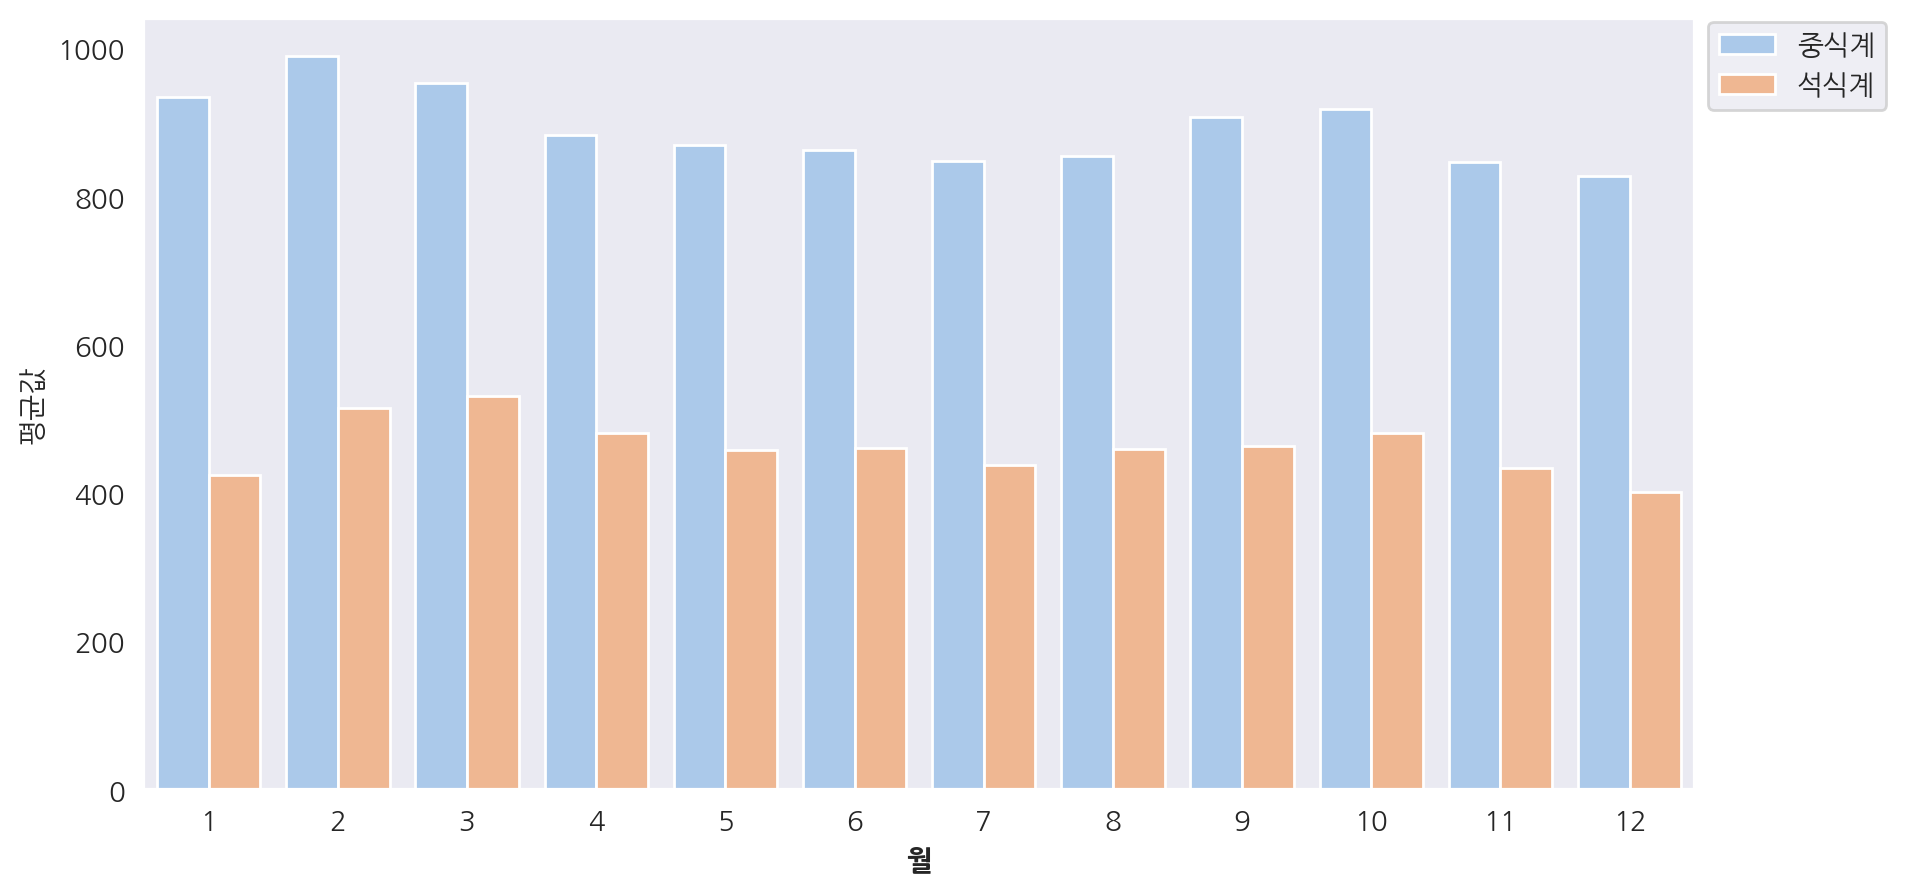

In [249]:
# ÏõîÎ≥Ñ Ï∂îÏù¥
melted_train = pd.melt(train, id_vars=['Ïõî'], value_vars=['Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ'], var_name='ÏãùÍ≥Ñ', value_name='ÌèâÍ∑†Í∞í')
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=melted_train, x='Ïõî', y='ÌèâÍ∑†Í∞í', hue='ÏãùÍ≥Ñ', errorbar=None)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.94))
ax.set_xlabel('Ïõî', fontweight='bold')
plt.show()

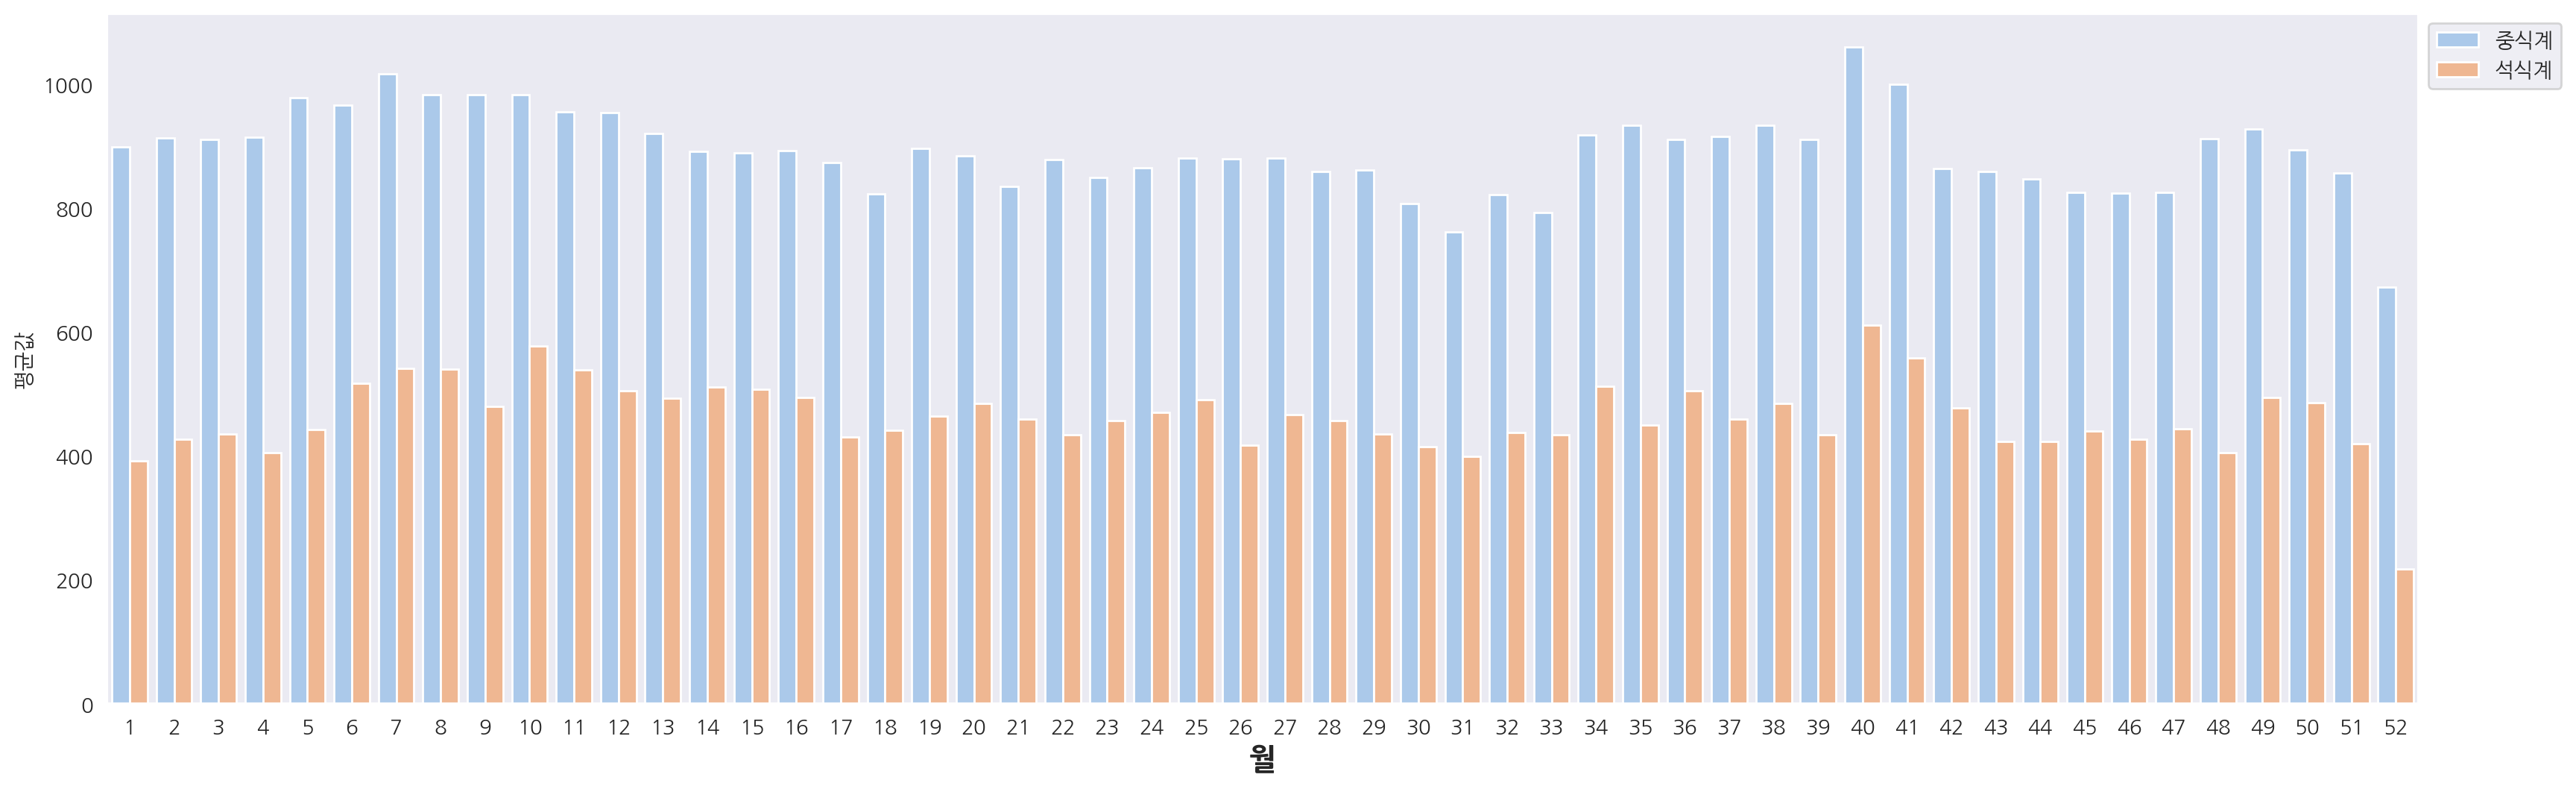

In [250]:
# Ï£ºÎ≥Ñ Ï∂îÏù¥
melted_train = pd.melt(train, id_vars=['Ï£º'], value_vars=['Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ'], var_name='ÏãùÍ≥Ñ', value_name='ÌèâÍ∑†Í∞í')
fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(data=melted_train, x='Ï£º', y='ÌèâÍ∑†Í∞í', hue='ÏãùÍ≥Ñ', errorbar=None)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.94))
ax.set_xlabel('Ïõî', fontweight='bold', fontsize=14)
plt.show()

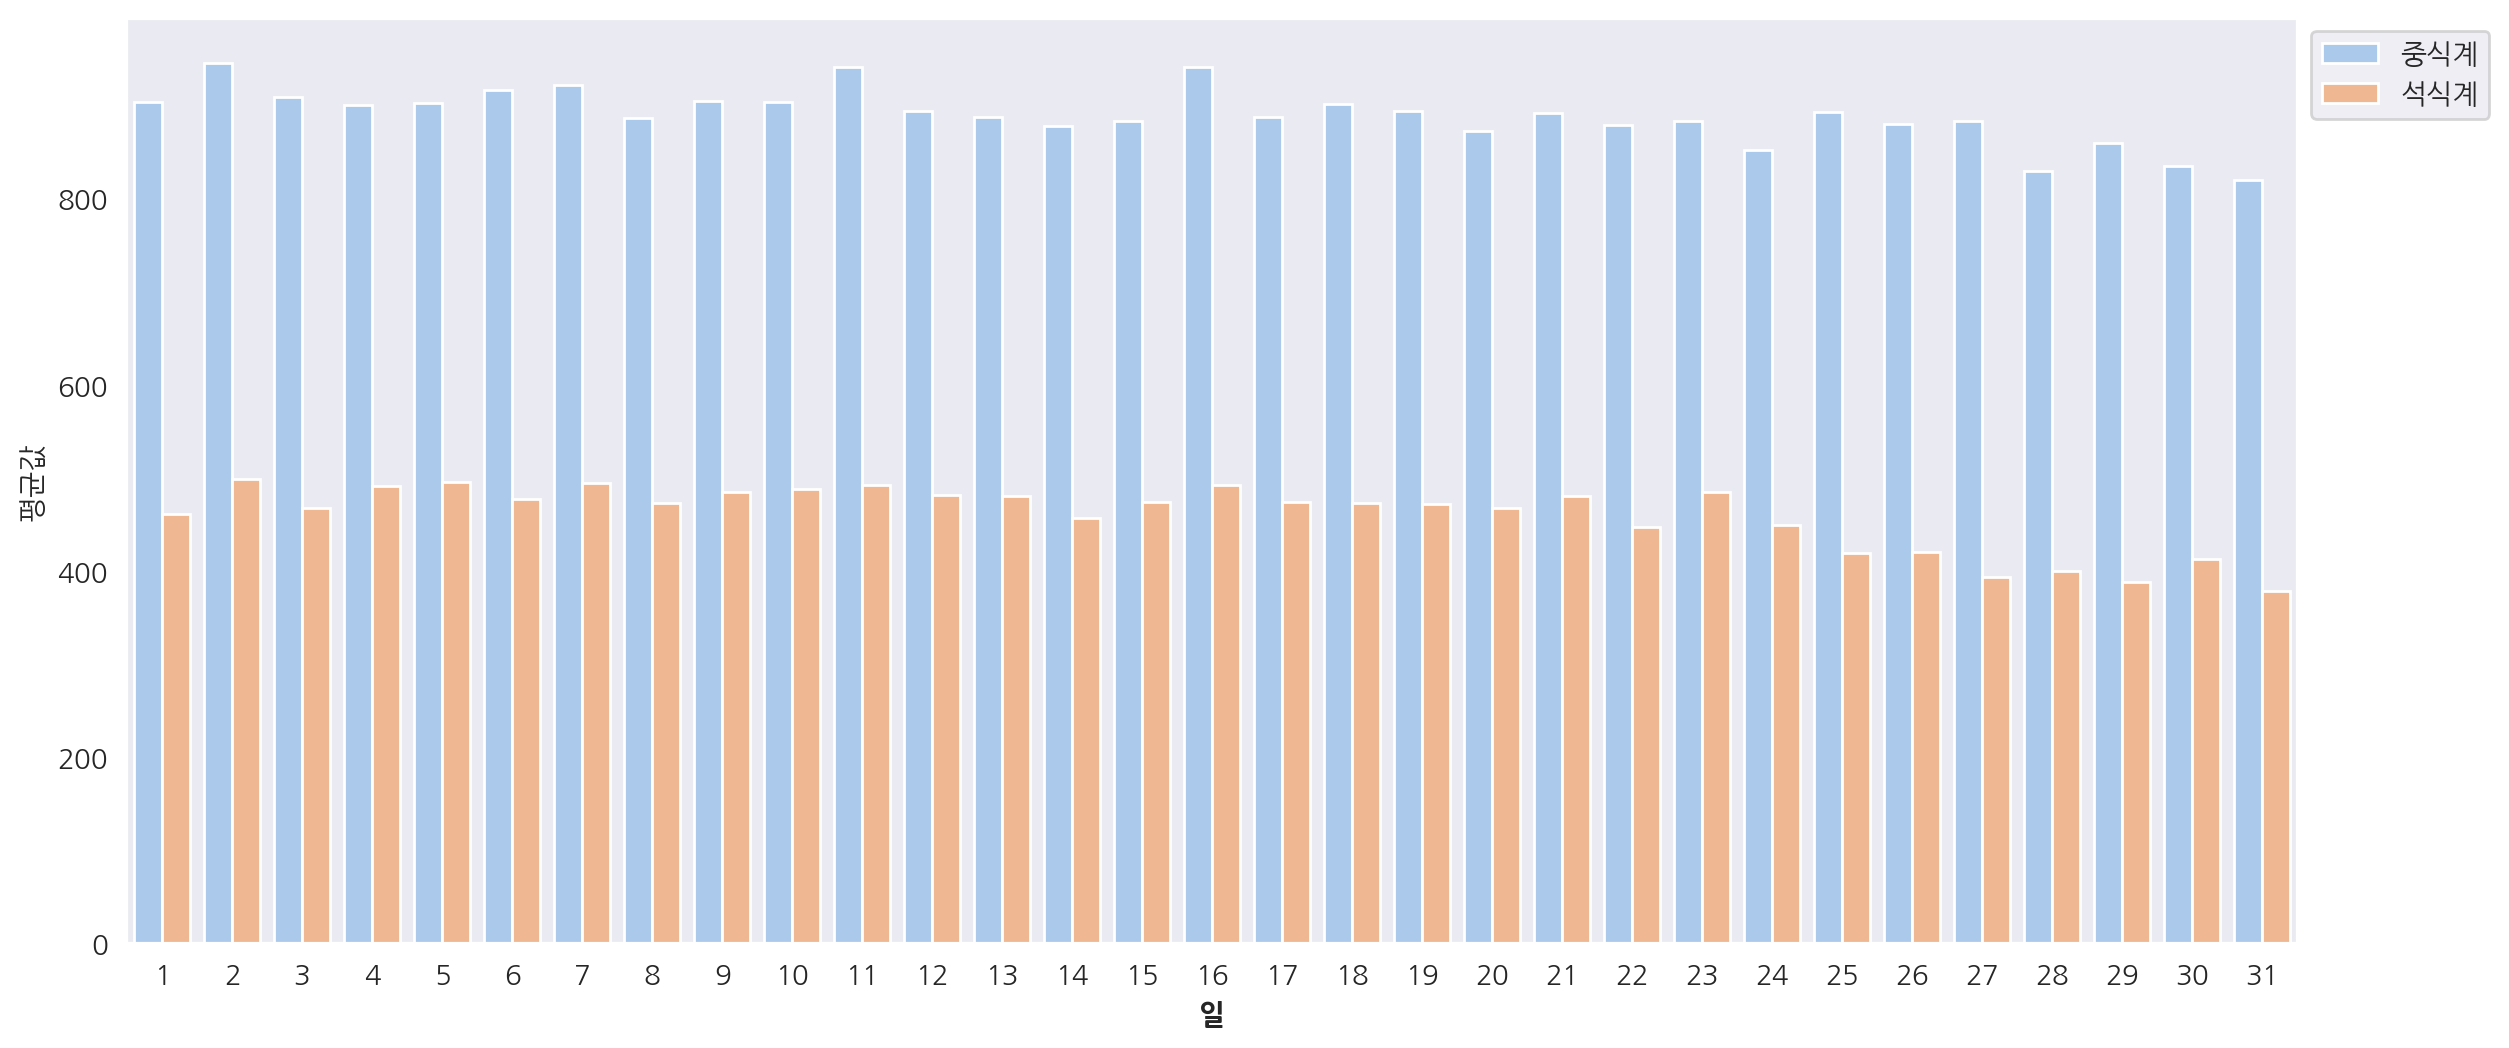

In [251]:
# ÏùºÎ≥Ñ Ï∂îÏù¥
melted_train = pd.melt(train, id_vars=['Ïùº'], value_vars=['Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ'], var_name='ÏãùÍ≥Ñ', value_name='ÌèâÍ∑†Í∞í')
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.barplot(data=melted_train, x='Ïùº', y='ÌèâÍ∑†Í∞í', hue='ÏãùÍ≥Ñ', errorbar=None)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.94))
ax.set_xlabel('Ïùº', fontweight='bold')
plt.show()

#### ÏöîÏùº Í¥ÄÎ†®

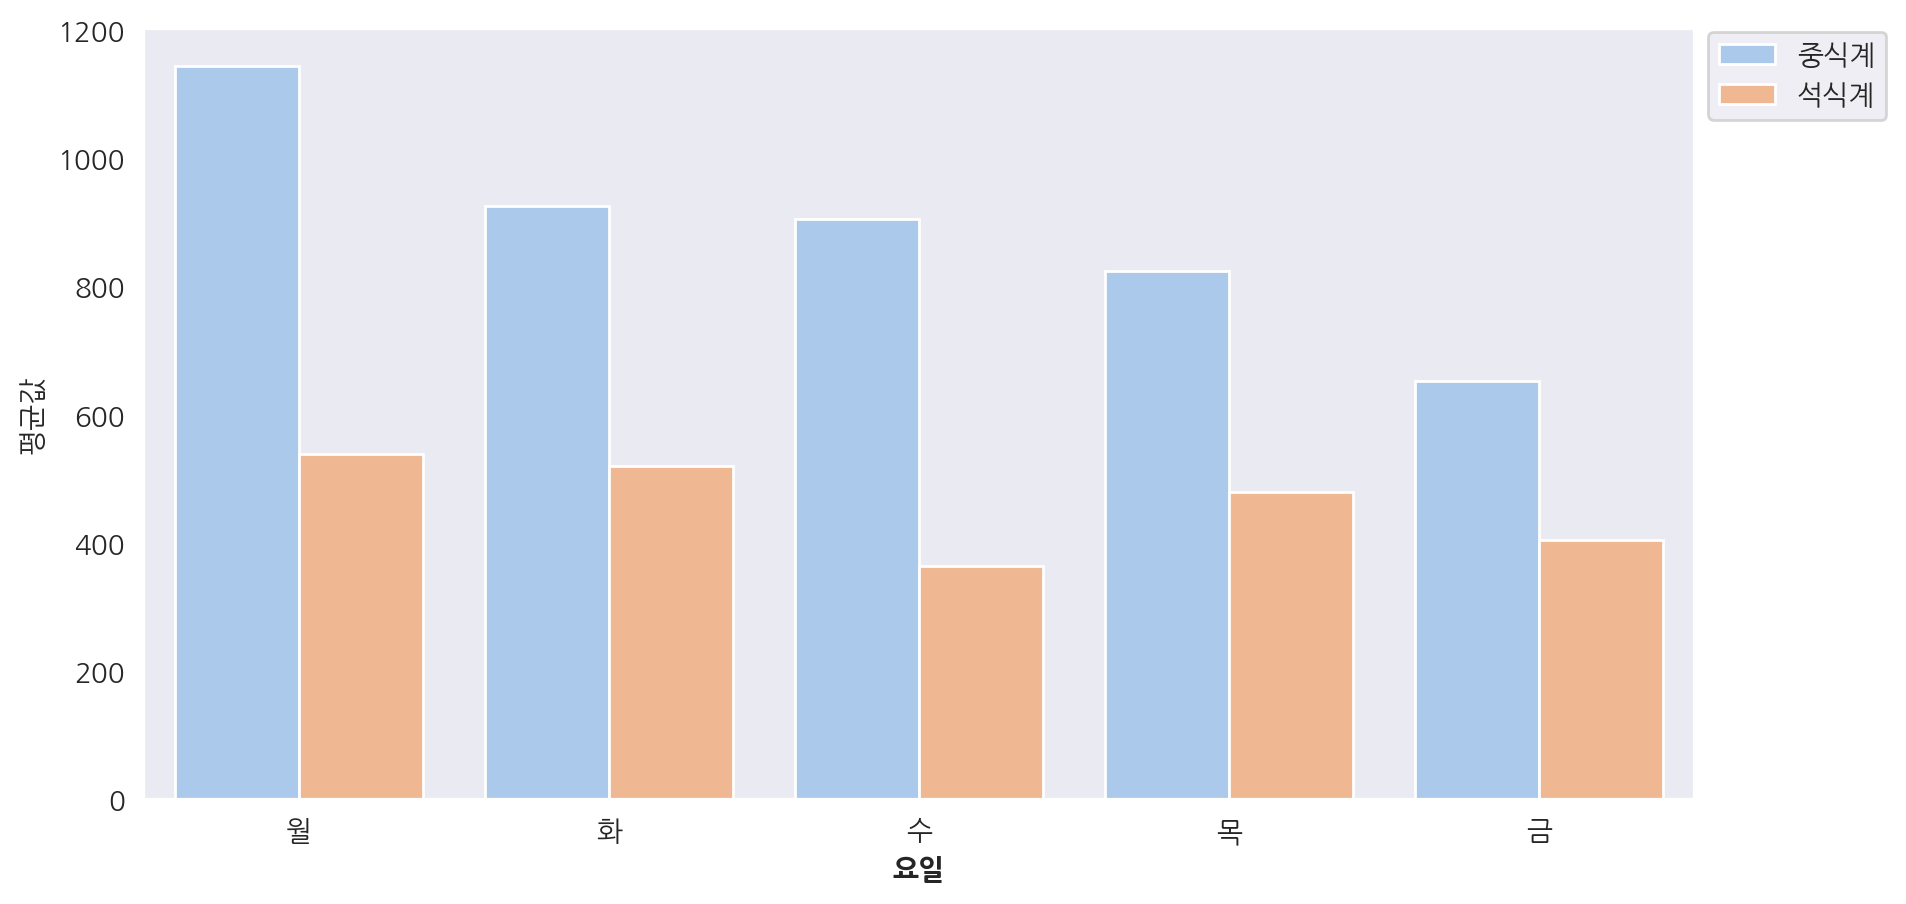

In [252]:
# ÏöîÏùºÎ≥Ñ Ï∂îÏù¥
melted_train = pd.melt(train, id_vars=['ÏöîÏùº'], value_vars=['Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ'], var_name='ÏãùÍ≥Ñ', value_name='ÌèâÍ∑†Í∞í')
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=melted_train, x='ÏöîÏùº', y='ÌèâÍ∑†Í∞í', hue='ÏãùÍ≥Ñ', errorbar=None)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.94))
ax.set_xlabel('ÏöîÏùº', fontweight='bold')
plt.show()

In [253]:
# ÏÑùÏãù ÏóÜÎäî ÎÇ† ÎπÑÏú®(ÏÑùÏãùÍ≥Ñ 0Ïù∏ ÏöîÏùº ÎπÑÏú®)
no_dinner = train[train['ÏÑùÏãùÍ≥Ñ'] == 0]
no_dinner['ÏöîÏùº'].value_counts(1)

Ïàò    0.930233
Í∏à    0.046512
Ìôî    0.023256
Name: ÏöîÏùº, dtype: float64

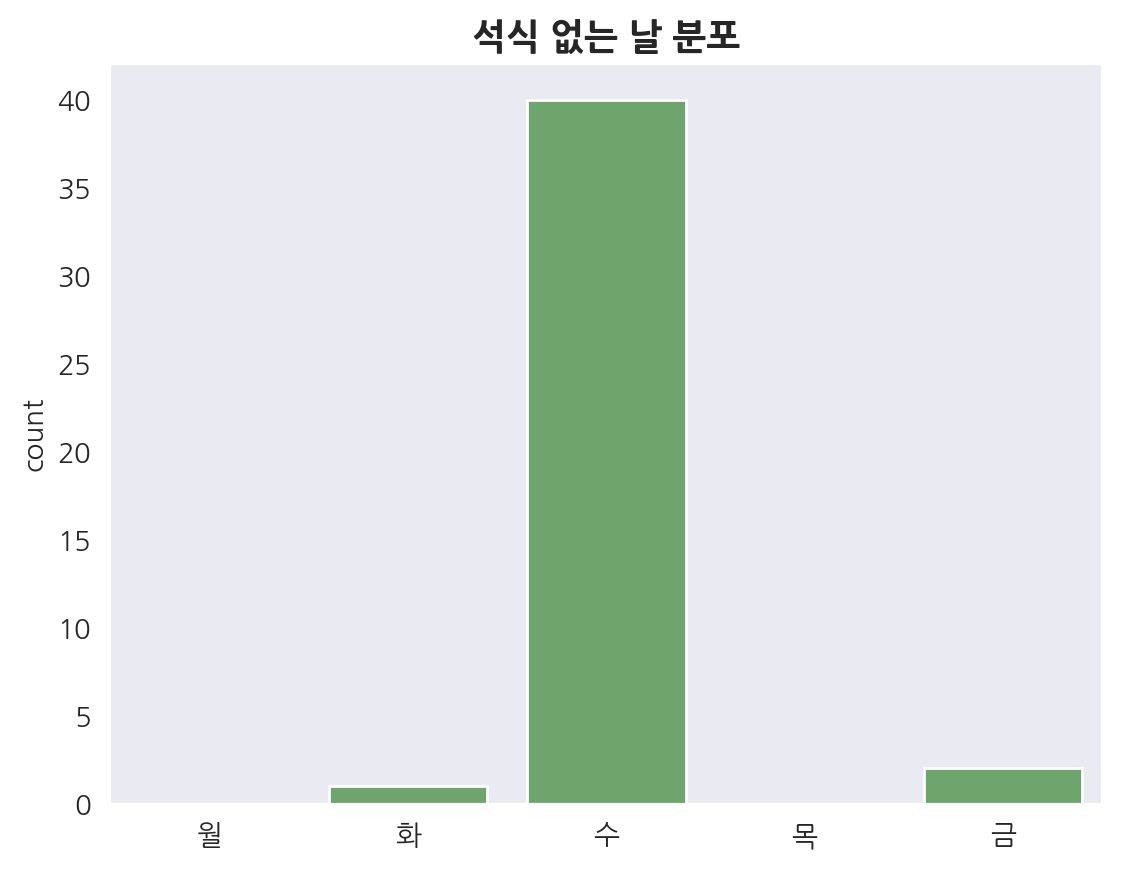

In [254]:
ax = sns.countplot(no_dinner, x = 'ÏöîÏùº', order = ['Ïõî','Ìôî','Ïàò','Î™©','Í∏à'], color=green_code[1]);
ax.set_title('ÏÑùÏãù ÏóÜÎäî ÎÇ† Î∂ÑÌè¨', fontsize=13, fontweight='bold')
ax.set_xlabel('')
plt.show()

In [255]:
# Ï§ëÏãù ÏàòÏπò - ÏöîÏùºÎ≥Ñ ÌèâÍ∑†
# ÏõîÌôîÏàòÎ™©Í∏à ÏàúÏúºÎ°ú Ï§ÑÏñ¥Îì†Îã§.
train.groupby('ÏöîÏùº').agg({'Ï§ëÏãùÍ≥Ñ':'mean',
                            'ÏÑùÏãùÍ≥Ñ':'mean'}).sort_values('Ï§ëÏãùÍ≥Ñ', ascending=False).style.background_gradient(subset=['Ï§ëÏãùÍ≥Ñ'])

In [256]:
# ÏÑùÏãù ÏàòÏπò - ÏöîÏùºÎ≥Ñ ÌèâÍ∑†
# ÏõîÌôîÎ™©Í∏àÏàò ÏàúÏúºÎ°ú Ï§ÑÏñ¥Îì†Îã§.
train.groupby('ÏöîÏùº').agg({'Ï§ëÏãùÍ≥Ñ':'mean',
                            'ÏÑùÏãùÍ≥Ñ':'mean'}).sort_values('Ï§ëÏãùÍ≥Ñ', ascending=False).style.background_gradient(subset=['ÏÑùÏãùÍ≥Ñ'])

#### Ï†ïÏõêÏàò Í¥ÄÎ†®

In [257]:
n_train = train.copy()

In [258]:
n_train['ÏùºÏûê']

0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: ÏùºÏûê, Length: 1205, dtype: datetime64[ns]

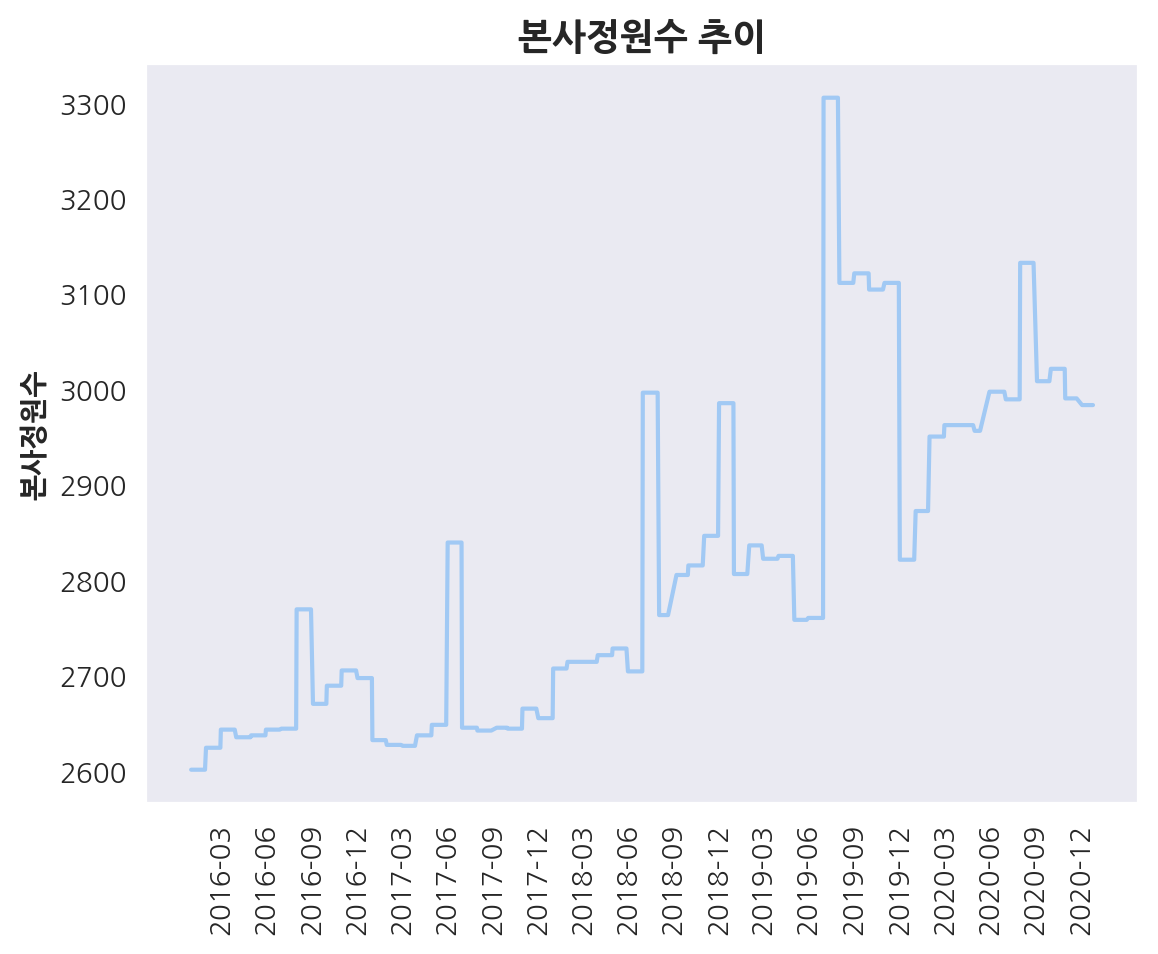

In [259]:
# Î≥∏ÏÇ¨Ï†ïÏõêÏàòÍ∞Ä Íæ∏Ï§ÄÌûà Ï¶ùÍ∞ÄÌï®
# ÏÑ±Ïû•ÌïòÎäî Í∏∞ÏóÖüëç
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y-%m')

ax = sns.lineplot(train, x='ÏùºÏûê', y='Î≥∏ÏÇ¨Ï†ïÏõêÏàò')

plt.xticks(pd.date_range(start='2016-02-01', end='2021-01-31', freq='q'), rotation = 90)
ax.xaxis.set_major_formatter(myFmt)

ax.set_title('Î≥∏ÏÇ¨Ï†ïÏõêÏàò Ï∂îÏù¥', fontsize=13, fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Î≥∏ÏÇ¨Ï†ïÏõêÏàò', fontweight='bold')

plt.show()

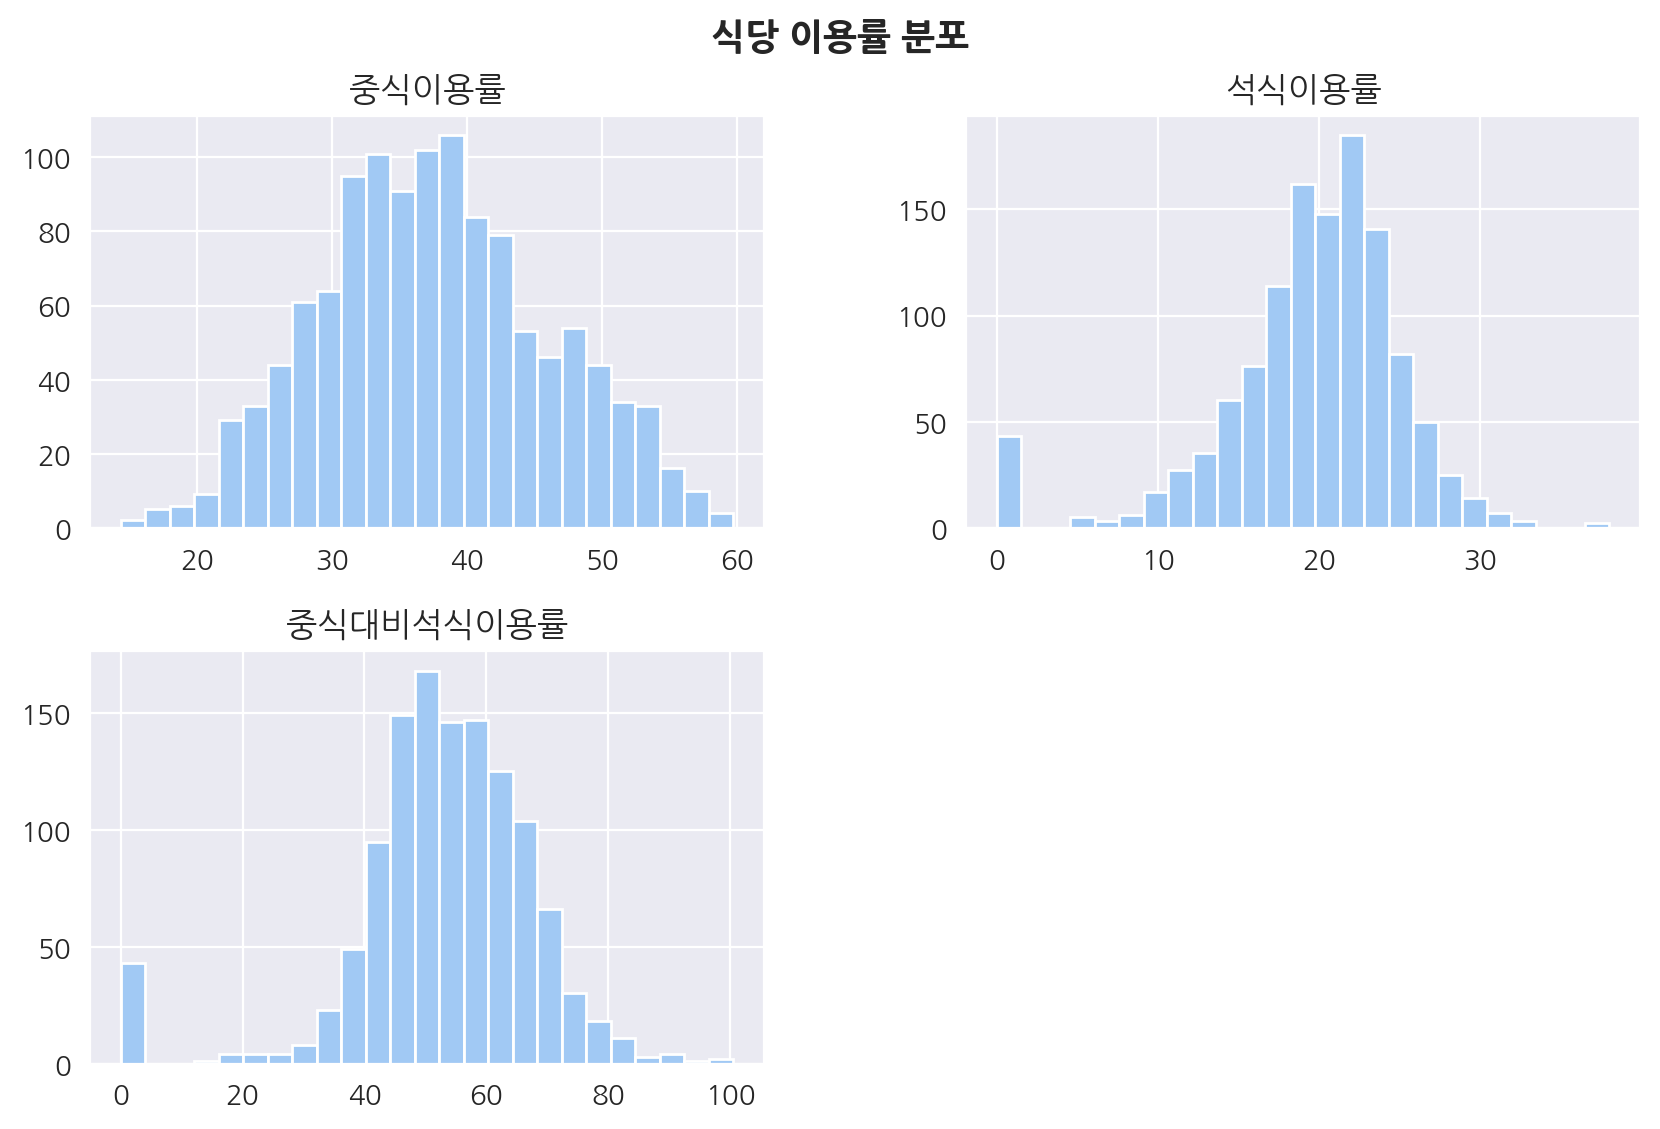

In [260]:
# Í∑ºÎ¨¥Ïûê ÎåÄÎπÑ ÏãùÏÇ¨ ÎπÑÏú®
train[['Ï§ëÏãùÏù¥Ïö©Î•†', 'ÏÑùÏãùÏù¥Ïö©Î•†', 'Ï§ëÏãùÎåÄÎπÑÏÑùÏãùÏù¥Ïö©Î•†']].hist(bins = 25, figsize=(10, 6));
plt.suptitle('ÏãùÎãπ Ïù¥Ïö©Î•† Î∂ÑÌè¨', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show()


In [261]:
train.columns

Index(['ÏùºÏûê', 'ÏöîÏùº', 'Î≥∏ÏÇ¨Ï†ïÏõêÏàò', 'Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò', 'Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò', 'Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò',
       'ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò', 'Ï§ëÏãùÎ©îÎâ¥', 'ÏÑùÏãùÎ©îÎâ¥', 'Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ', 'ÎØ∏Ï∂úÍ∑ºÏûêÏàò', 'Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò', 'Ï§ëÏãùÏù¥Ïö©Î•†',
       'ÏÑùÏãùÏù¥Ïö©Î•†', 'Ï§ëÏãùÎåÄÎπÑÏÑùÏãùÏù¥Ïö©Î•†', 'ÎÖÑ', 'Ïõî', 'Ïùº', 'Ï£º', 'ÎÖÑÏõî'],
      dtype='object')

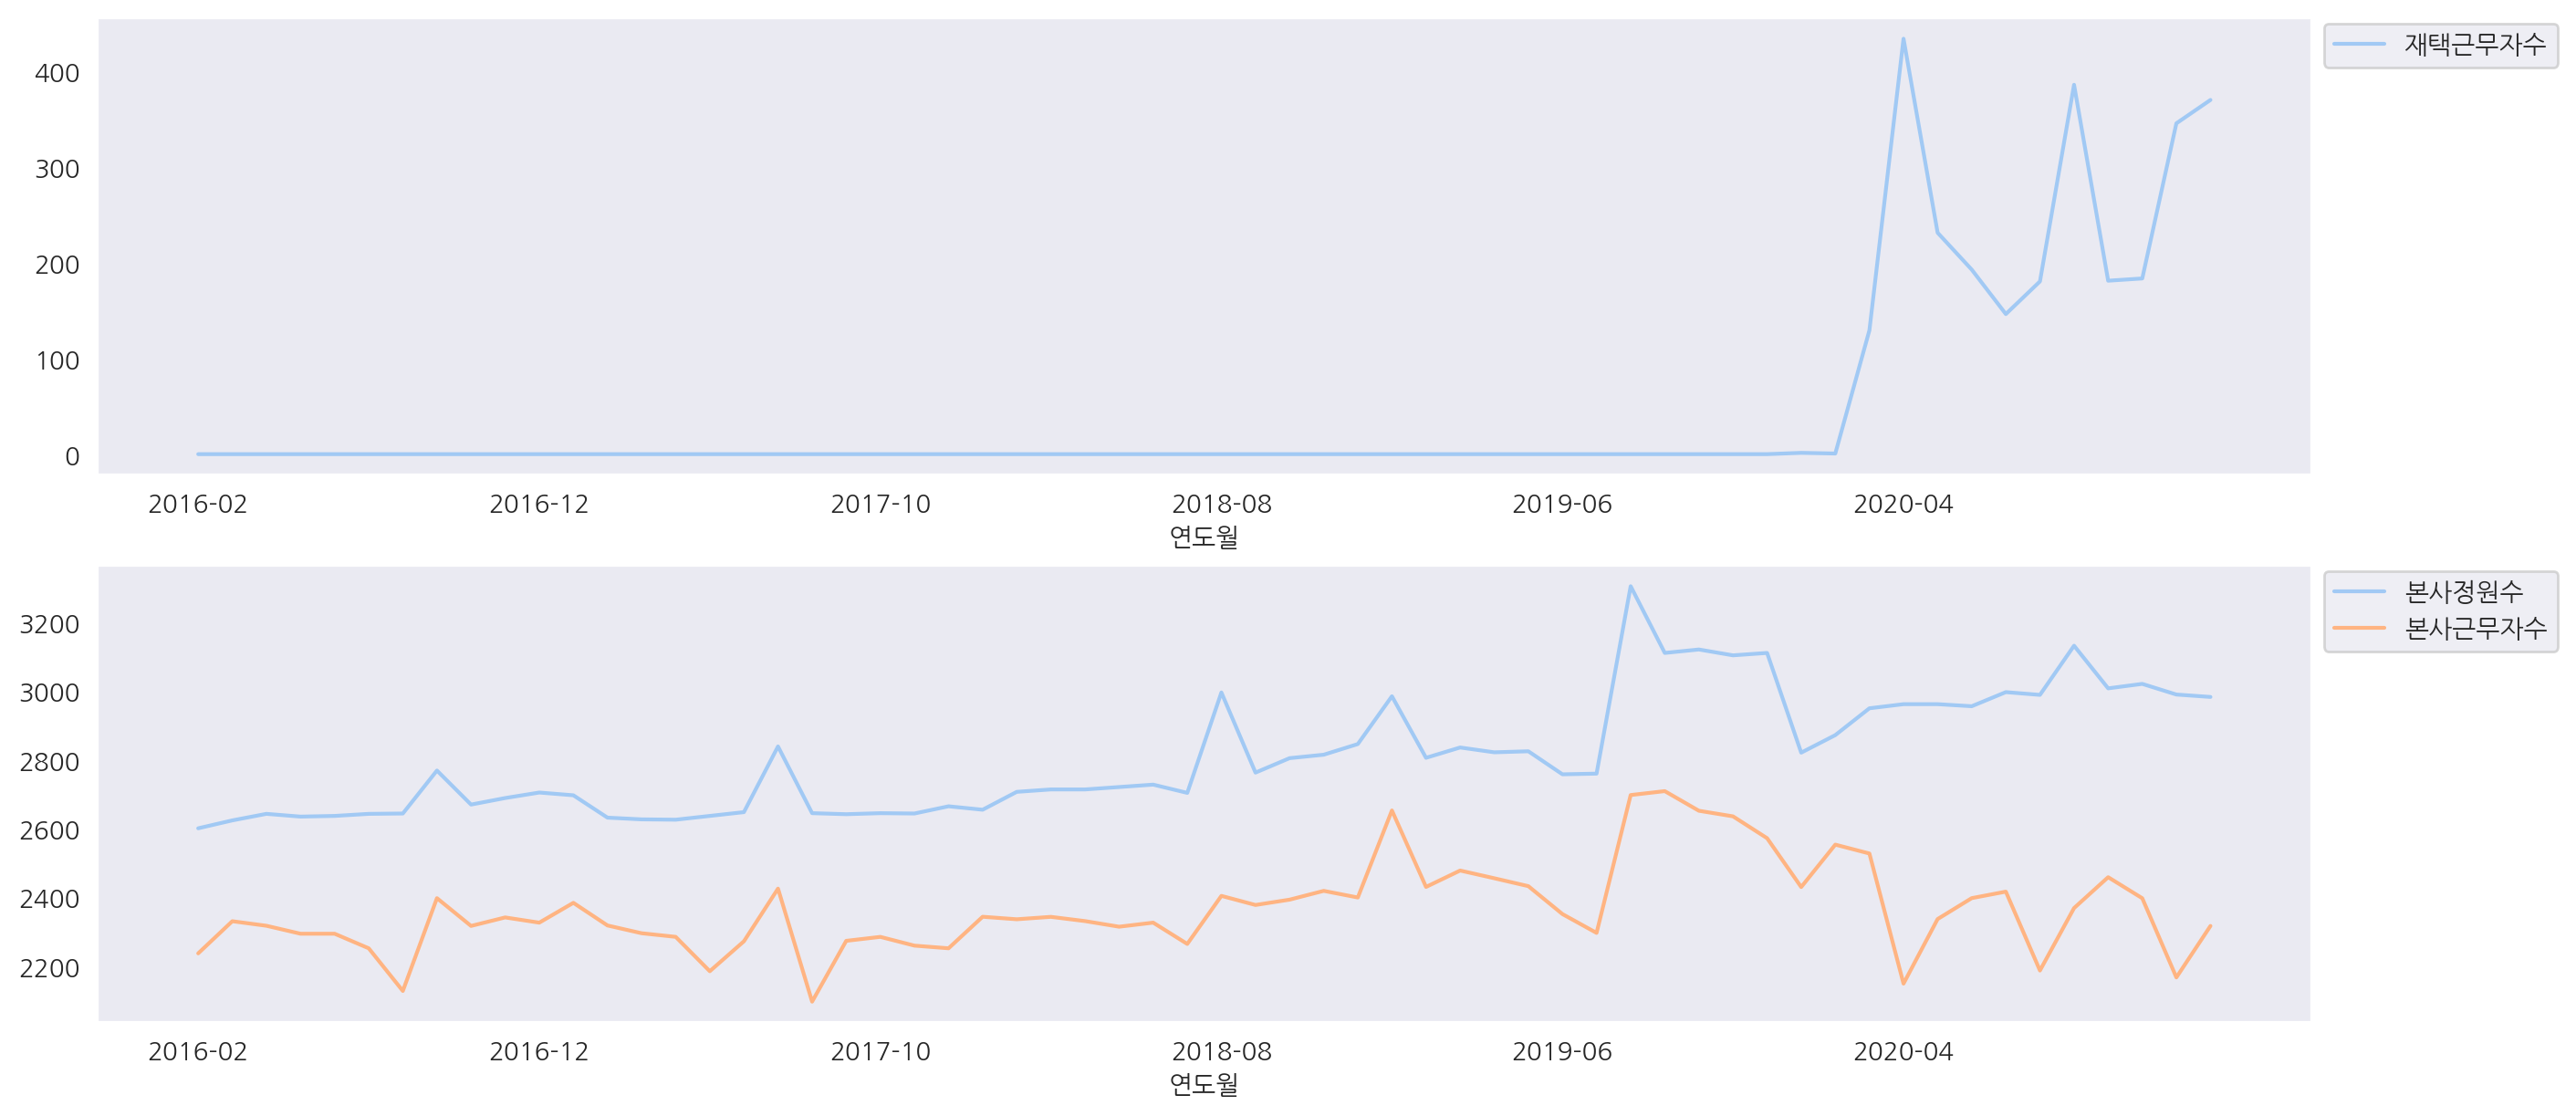

In [262]:
fig, axs = plt.subplot_mosaic(
    [['1'],
     ['2']],
    figsize=(14, 6), 
    layout='constrained')

ÎÖÑÎèÑÎ≥Ñ_ÌäπÏàòÏù∏Ïõê = train[['ÎÖÑÏõî', 'ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò']].groupby('ÎÖÑÏõî').mean()
ÎÖÑÎèÑÎ≥Ñ_Ï†ïÏõê_Ïù∏Ïõê = train[['ÎÖÑÏõî','Î≥∏ÏÇ¨Ï†ïÏõêÏàò','Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò']].groupby('ÎÖÑÏõî').mean()

ÎÖÑÎèÑÎ≥Ñ_ÌäπÏàòÏù∏Ïõê.plot(kind='line', ax=axs['1'])
ÎÖÑÎèÑÎ≥Ñ_Ï†ïÏõê_Ïù∏Ïõê.plot(kind='line', ax=axs['2'])

axs['1'].legend(['Ïû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò'], loc='center left', bbox_to_anchor=(1, 0.94))
axs['2'].legend(loc='center left', bbox_to_anchor=(1, 0.9))

axs['1'].set_xlabel('Ïó∞ÎèÑÏõî')
axs['2'].set_xlabel('Ïó∞ÎèÑÏõî');

#### Ìú¥Í∞ÄÏûêÏàò Í¥ÄÎ†®

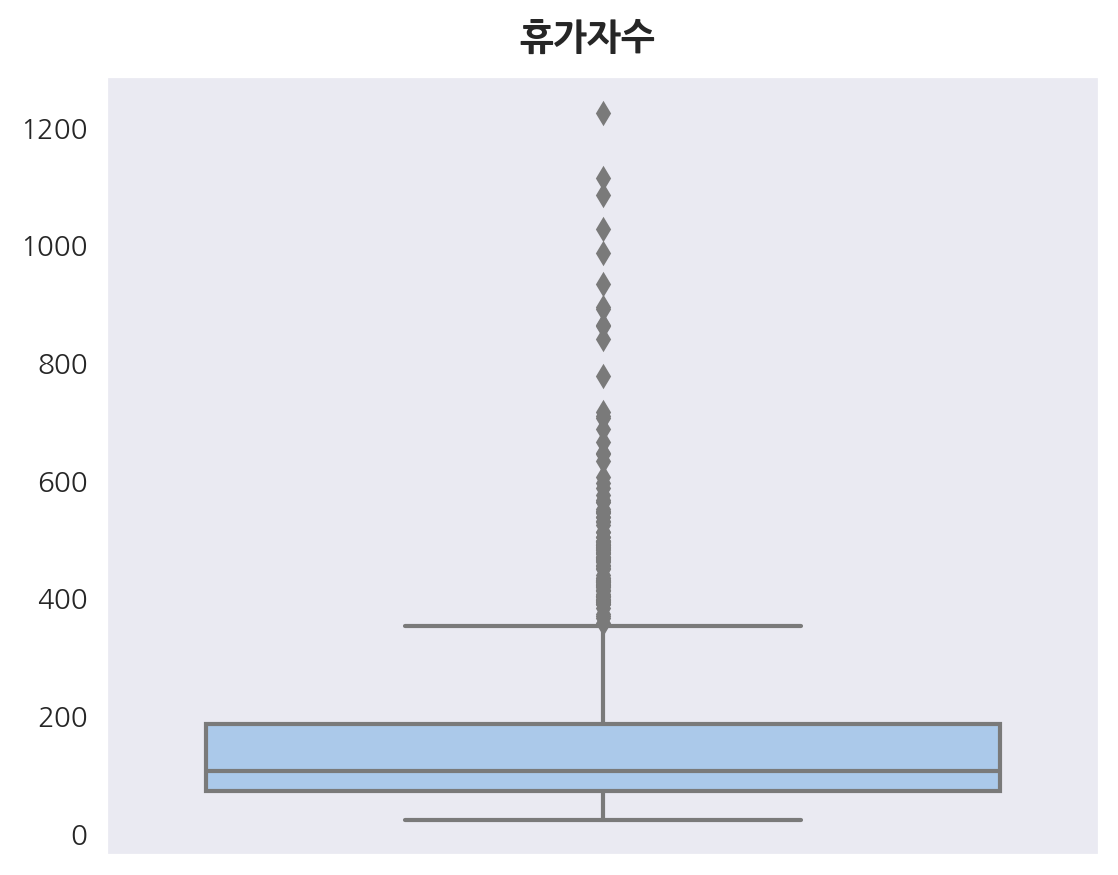

In [263]:
fig, ax = plt.subplots()
sns.boxplot(train['Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò']);
plt.suptitle('Ìú¥Í∞ÄÏûêÏàò', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.92)
ax.set_xticks([]);

In [264]:
# Ìú¥Í∞ÄÏûêÏàò Ïù¥ÏÉÅÏπò ÌôïÏù∏
q3, q1 = train['Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò'].describe()['75%'], train['Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò'].describe()['25%']
iqr = q3 - q1
upper_whisker = q3 +1.5 * iqr

print(upper_whisker)
train[train['Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò'] > upper_whisker]['ÏöîÏùº'].value_counts()

356.0


Í∏à    32
Ïõî    24
Î™©    20
Ìôî    16
Ïàò    16
Name: ÏöîÏùº, dtype: int64

In [265]:
# Ìú¥Ïùº Ï†ÑÎÇ†Ïù¥ÎÇò Ïó∞Îßê Îì± Ìú¥Í∞ÄÏûê ÎπÑÏú®Ïù¥ ÎÜíÏùÑ Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêòÎäî ÎÇ†ÏßúÏóê ÎåÄÌïú Ï≤òÎ¶¨ ÌïÑÏöî
train.sort_values('Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò', ascending = False).head(5)

ÏùºÏûê ÏöîÏùº  Î≥∏ÏÇ¨Ï†ïÏõêÏàò  Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò  Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò  Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò  ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò  \
310  2017-05-04  Î™©   2637    1224      41              45          0.0   
1038 2020-05-04  Ïõî   2962    1113     117              91        189.0   
709  2018-12-31  Ïõî   2846    1085     132              28          0.0   
864  2019-08-16  Í∏à   3305    1026     208               7          0.0   
1129 2020-09-28  Ïõî   3132     985     188              81        142.0   

                                                   Ï§ëÏãùÎ©îÎâ¥  \
310   ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Îì§Íπ®ÎØ∏Ïó≠Íµ≠  Îã≠Í∞àÎπÑ  ÏÉùÏÑ†ÍπåÏä§*ÌÉÄÎ•¥ÏÜåÏä§  Î¨¥ÏÉùÏ±Ñ  Ìè¨Í∏∞ÍπÄ...   
1038  ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏,ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) Î≤ÑÏÑØÎì§Íπ®Íµ≠  ÏÇºÍ≤πÏÇ¥ÎçîÎçïÍ≥†Ï∂îÏû•Íµ¨Ïù¥  Í≥∞Ï∑®,Î™ÖÏù¥ÎÇò...   
709   ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) ÏΩ©ÎÇòÎ¨ºÍµ≠  ÎèàÏú°Í≥†Ï∂îÏû•Î∂àÍ≥†Í∏∞ (ÎèºÏßÄÍ≥†Í∏∞:Íµ≠ÎÇ¥ÏÇ∞) Í∞êÏûêÏ±ÑÎ≥∂Ïùå...   
864   ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Îã≠Í∞úÏû•  Ïá†Í≥†Í∏∞Ïû•Ï°∞Î¶º  Ïû°Ï±Ñ  ÎπÑÎ¶ÑÎÇòÎ¨ºÎêúÏû•Î¨¥Ïπ®  Ìè¨Í∏∞ÍπÄÏπò...   
1129  ÏåÄÎ∞•/ÌùëÎØ∏Î∞•/Ï∞∞ÌòÑÎØ∏Î∞• Îñ°ÎßåÎëêÍµ≠ Ïò§Î¶¨ÎåÄÌå®Î∂àÍ≥†Í∏∞ ÍΩÅÏπòÏ∫îÍπÄÏπòÏ°∞Î¶º ÌååÌîÑÎ¶¨Ïπ¥Ìï¥Ï¥àÎ¨¥Ïπ® Ìè¨Í∏∞ÍπÄÏπò...   

                                                   ÏÑùÏãùÎ©îÎâ¥    Ï§ëÏãùÍ≥Ñ  ...   ÎØ∏Ï∂úÍ∑ºÏûêÏàò  \
310   ÏïºÏ±ÑÎ≥∂ÏùåÎ∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Ïú†Î∂ÄÏ£ºÎ®∏ÎãàÍµ≠  ÎØ∏ÎãàÎ≤ÑÍ±∞  ÏïºÏ±ÑÎπÑÎπîÎßåÎëê  Ïä§Ìã±Îã®Î¨¥ÏßÄ/Ïò§Î†åÏßÄÏ£º...  383.0  ...  1265.0   
1038  ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏,ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) Îã§Ïä¨Í∏∞ÏïÑÏö±Íµ≠  Í∞àÎ¶≠ÌååÎã≠  ÎèàÏ±ÑÌò∏Î∞ïÎ≥∂Ïùå  Ïß†ÏßÄÏò§...  504.0  ...  1419.0   
709   ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Îì§Íπ®ÏãúÎûòÍ∏∞Íµ≠  ÌõàÏ†úÏò§Î¶¨Î≥∂Ïùå  Í≥ÑÎûÄÏ∞ú  Ï∞∏ÎÇòÎ¨ºÏÉùÏ±Ñ  Ìè¨Í∏∞ÍπÄ...  332.0  ...  1217.0   
864   ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Ìï¥Î¨ºÏß¨ÎΩïÍµ≠  ÎèàÏú°Íµ¥ÏÜåÏä§Î≥∂Ïùå  Ïá†Í≥†Í∏∞ÎëêÎ∂ÄÏ∞ú  Î©∏ÏπòÎ≥∂Ïùå  Ïó¥...  466.0  ...  1234.0   
1129              ÌùëÎØ∏Î∞• Ïö∞Í±∞ÏßÄÎêúÏû•Íµ≠ Îã≠Î≥∂ÏùåÌÉï ÏÑ≠ÏÇ∞Ï†ÅÎç∞Î¶¨ÏïºÎÅºÏ°∞Î¶º ÏΩ©ÎÇòÎ¨ºÎ¨¥Ïπ® Ìè¨Í∏∞ÍπÄÏπò   358.0  ...  1315.0   

      Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò      Ï§ëÏãùÏù¥Ïö©Î•†      ÏÑùÏãùÏù¥Ïö©Î•†  Ï§ëÏãùÎåÄÎπÑÏÑùÏãùÏù¥Ïö©Î•†     ÎÖÑ   Ïõî   Ïùº   Ï£º       ÎÖÑÏõî  
310   1372.0  27.915452  19.096210  68.407311  2017   5   4  18  2017-05  
1038  1543.0  32.663642   7.971484  24.404762  2020   5   4  19  2020-05  
709   1629.0  20.380602   8.287293  40.662651  2018  12  31   1  2018-12  
864   2071.0  22.501207  15.113472  67.167382  2019   8  16  33  2019-08  
1129  1817.0  19.702807   9.080903  46.089385  2020   9  28  40  2020-09  

[5 rows x 21 columns]

In [266]:
holiday = holiday.iloc[1:78,:] # train Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ìè¨Ìï®ÎêòÎäî ÎÇ†ÏßúÍπåÏßÄ ÏÑ†ÌÉù
holiday['ÏùºÏûê'] = pd.to_datetime(holiday['ÎÇ†Ïßú'])
holiday = holiday[['ÏùºÏûê', 'Í≥µÌú¥Ïùº', 'ÏöîÏùº']]
holiday = holiday[~holiday['ÏöîÏùº'].isin(['ÌÜ†','Ïùº'])]
holiday = holiday[['ÏùºÏûê', 'Í≥µÌú¥Ïùº']]
holiday.head(3)

ÏùºÏûê    Í≥µÌú¥Ïùº
2 2016-02-08     ÏÑ§ÎÇ†
3 2016-02-09  ÏÑ§ÎÇ† Ïó∞Ìú¥
4 2016-03-01   3¬∑1Ï†à

In [267]:
all_holiday = pd.merge(train, holiday, how='outer', on='ÏùºÏûê')
all_holiday = all_holiday.sort_values(by='ÏùºÏûê')
holiday_idx = all_holiday['Í≥µÌú¥Ïùº'].notna() #Í≥µÌú¥Ïùº Ïó¨Î∂ÄÎ•º ÌôïÏù∏Ìï¥Ï£ºÍ≥†
all_holiday.loc[holiday_idx.shift(-1, fill_value=False) | holiday_idx.shift(1, fill_value=False) | holiday_idx, 'Í≥µÌú¥Ïùº_YN'] = 1 # Ìï¥Îãπ ÌñâÏùò ÏúóÌñâ, ÏïÑÎûòÌñâ, Ìï¥Îãπ ÌñâÏóê 'Í≥µÌú¥Ïùº_YN' columnÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† Í∞íÏùÑ 1Î°ú ÏÑ§Ï†ï
all_holiday.loc[all_holiday['Í≥µÌú¥Ïùº_YN'].isna(), 'Í≥µÌú¥Ïùº_YN'] = 0
all_holiday.head(30)

ÏùºÏûê   ÏöîÏùº   Î≥∏ÏÇ¨Ï†ïÏõêÏàò  Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò  Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò  Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò  ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò  \
0    2016-02-01    Ïõî  2601.0    50.0   150.0           238.0          0.0   
1    2016-02-02    Ìôî  2601.0    50.0   173.0           319.0          0.0   
2    2016-02-03    Ïàò  2601.0    56.0   180.0           111.0          0.0   
3    2016-02-04    Î™©  2601.0   104.0   220.0           355.0          0.0   
4    2016-02-05    Í∏à  2601.0   278.0   181.0            34.0          0.0   
1205 2016-02-08  NaN     NaN     NaN     NaN             NaN          NaN   
1206 2016-02-09  NaN     NaN     NaN     NaN             NaN          NaN   
5    2016-02-11    Î™©  2601.0   383.0   143.0           417.0          0.0   
6    2016-02-12    Í∏à  2601.0   389.0   156.0            93.0          0.0   
7    2016-02-15    Ïõî  2601.0    87.0   204.0           482.0          0.0   
8    2016-02-16    Ìôî  2601.0    72.0   236.0           526.0          0.0   
9    2016-02-17    Ïàò  2601.0    78.0   250.0            23.0          0.0   
10   2016-02-18    Î™©  2601.0    77.0   254.0           367.0          0.0   
11   2016-02-19    Í∏à  2601.0   145.0   252.0            69.0          0.0   
12   2016-02-22    Ïõî  2601.0    90.0   207.0           434.0          0.0   
13   2016-02-23    Ìôî  2601.0    57.0   237.0           488.0          0.0   
14   2016-02-24    Ïàò  2601.0    54.0   232.0            14.0          0.0   
15   2016-02-25    Î™©  2601.0    56.0   261.0           335.0          0.0   
16   2016-02-26    Í∏à  2601.0   144.0   278.0            42.0          0.0   
17   2016-02-29    Ïõî  2601.0   595.0   168.0           110.0          0.0   
1207 2016-03-01  NaN     NaN     NaN     NaN             NaN          NaN   
18   2016-03-02    Ïàò  2624.0   127.0   182.0           261.0          0.0   
19   2016-03-03    Î™©  2624.0    61.0   224.0           351.0          0.0   
20   2016-03-04    Í∏à  2624.0    83.0   247.0            79.0          0.0   
21   2016-03-07    Ïõî  2624.0    50.0   195.0           456.0          0.0   
22   2016-03-08    Ìôî  2624.0    47.0   212.0           426.0          0.0   
23   2016-03-09    Ïàò  2624.0    43.0   225.0             0.0          0.0   
24   2016-03-10    Î™©  2624.0    55.0   245.0           290.0          0.0   
25   2016-03-11    Í∏à  2624.0   108.0   275.0            76.0          0.0   
26   2016-03-14    Ïõî  2624.0    61.0   183.0           376.0          0.0   

                                                   Ï§ëÏãùÎ©îÎâ¥  \
0     ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) Ïò§ÏßïÏñ¥Ï∞åÍ∞ú  Ïá†Î∂àÍ≥†Í∏∞ (Ïá†Í≥†Í∏∞:Ìò∏Ï£ºÏÇ∞) Í≥ÑÎûÄÏ∞ú ...   
1     ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) ÍπÄÏπòÏ∞åÍ∞ú  Í∞ÄÏûêÎØ∏ÌäÄÍπÄ  Î™®Îë†ÏÜåÏÑ∏ÏßÄÍµ¨Ïù¥  ÎßàÎäòÏ´ëÎ¨¥...   
2     Ïπ¥Î†àÎçÆÎ∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) ÌåΩÏù¥Ïû•Íµ≠  ÏπòÌÇ®ÌïëÍ±∞ (Îã≠Í≥†Í∏∞:Íµ≠ÎÇ¥ÏÇ∞) Ï´ÑÎ©¥ÏïºÏ±ÑÎ¨¥Ïπ® ...   
3     ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) Ïá†Í≥†Í∏∞Î¨¥Íµ≠  Ï£ºÍæ∏ÎØ∏Î≥∂Ïùå  Î∂ÄÏ∂îÏ†Ñ  ÏãúÍ∏àÏπòÎÇòÎ¨º  ...   
4     ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) Îñ°Íµ≠  ÎèàÏú°Ïî®ÏïóÍ∞ïÏ†ï (ÎèºÏßÄÍ≥†Í∏∞:Íµ≠ÎÇ¥ÏÇ∞) Ïö∞ÏóâÏû°Ï±Ñ...   
1205                                                NaN   
1206                                                NaN   
5     ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) ÏãúÎûòÍ∏∞Íµ≠  ÌõàÏ†úÏò§Î¶¨Íµ¨Ïù¥  ÎèÑÌÜ†Î¶¨Î¨µÎ¨¥Ïπ®  ÏåàÎ¨¥/Ïñë...   
6     ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ,ÌòÑÎØ∏ÌùëÎØ∏:Íµ≠ÎÇ¥ÏÇ∞) ÍΩÉÍ≤åÌÉï  ÎèàÏú°Íµ¥ÏÜåÏä§Î≥∂Ïùå  Ïò•ÏàòÏàòÏ†Ñ  Ïú†Ï±ÑÎÇòÎ¨º  ...   
7     ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) ÏãúÍ∏àÏπòÍµ≠  Îã≠Í∞êÏûêÏ°∞Î¶º (Îã≠Í≥†Í∏∞:Íµ≠ÎÇ¥ÏÇ∞) Ïó∞ÎëêÎ∂Ä*ÏñëÎÖêÏû•  ...   
8     ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Ïá†Í≥†Í∏∞Î¨¥Íµ≠ (Ïá†Í≥†Í∏∞:Ìò∏Ï£ºÏÇ∞) ÌÉïÏàòÏñ¥ (ÎèôÌÉú:Îü¨ÏãúÏïÑÏÇ∞) Ïò§...   
9     ÏåÄÎ∞•/Ïû°Í≥°Î∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) ÎÉâÏù¥ÎêúÏû•Íµ≠  Ïá†Í≥†Í∏∞Ïû•Ï°∞Î¶º (Ïá†Í≥†Í∏∞:Ìò∏Ï£ºÏÇ∞) ÌÜµÎèÑÎùºÏßÄÍµ¨Ïù¥ ...   
10    ÎÇôÏßÄÎπÑÎπîÎ∞• (ÎÇôÏßÄ:Ï§ëÍµ≠ÏÇ∞,ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Ïú†Î∂ÄÏû•Íµ≠  Í≥†Íµ¨Î

In [268]:
all_holiday = all_holiday[~all_holiday['Î≥∏ÏÇ¨Ï†ïÏõêÏàò'].isna()] # ÏãùÏàòÎç∞Ïù¥ÌÑ∞ ÏóÜÎäî ÎÇ† ÎπºÍ∏∞
all_holiday = all_holiday[~all_holiday['ÏöîÏùº'].isin(['ÌÜ†','Ïùº'])] # Ï£ºÎßê ÎπºÍ∏∞
all_holiday.drop('Í≥µÌú¥Ïùº', axis=1, inplace=True) # Ìú¥ÏùºÎ™Ö Í∞íÏù¥ ÏûàÎäî ÌñâÏùÄ Ïñ¥Ï∞®Ìîº ÏãùÏàòÎç∞Ïù¥ÌÑ∞ ÏóÜÏñ¥ÏÑú Îπ†Ïßê

In [269]:
# all_holiday.tail(30)

In [270]:
n_train = n_train[['ÏùºÏûê', 'ÏöîÏùº', 'Î≥∏ÏÇ¨Ï†ïÏõêÏàò', 'Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò', 'Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò', 'Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò',
       'ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò', 'Ï§ëÏãùÎ©îÎâ¥', 'ÏÑùÏãùÎ©îÎâ¥', 'Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ']]

In [271]:
n_train = n_train.rename(columns={'Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò':'Ï∂îÍ∞ÄÍ∑ºÎ¨¥Í±¥Ïàò', 'ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò':'Ïû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò'})

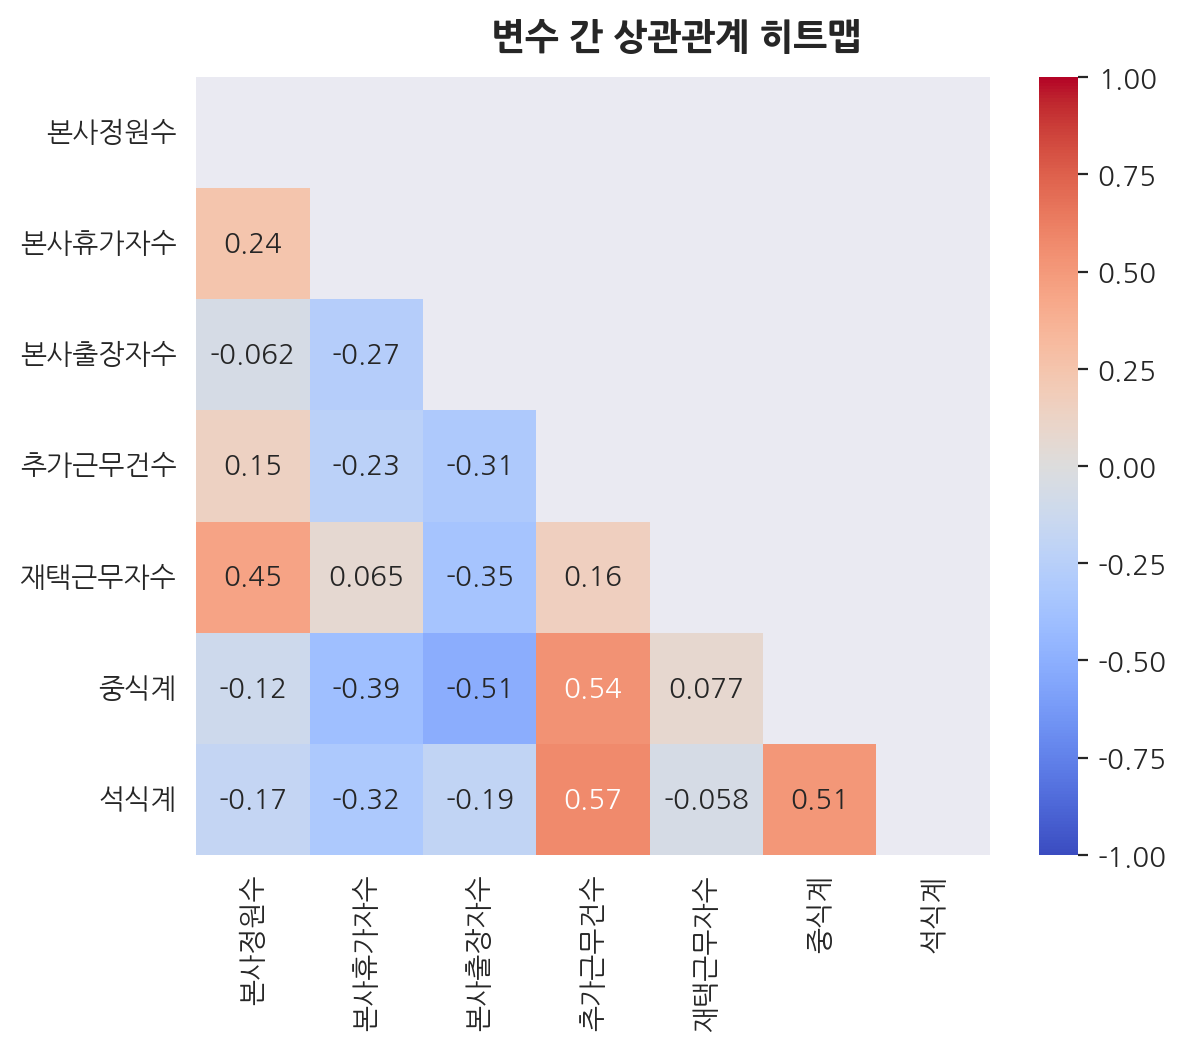

In [272]:
mask = np.triu(np.ones_like(n_train.drop(columns='ÏöîÏùº').corr()))


sns.heatmap(n_train.drop(columns='ÏöîÏùº').corr(),
            annot=True,
            vmin=-1, vmax=1,
            cmap='coolwarm',
            mask=mask);

plt.suptitle('Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.92)

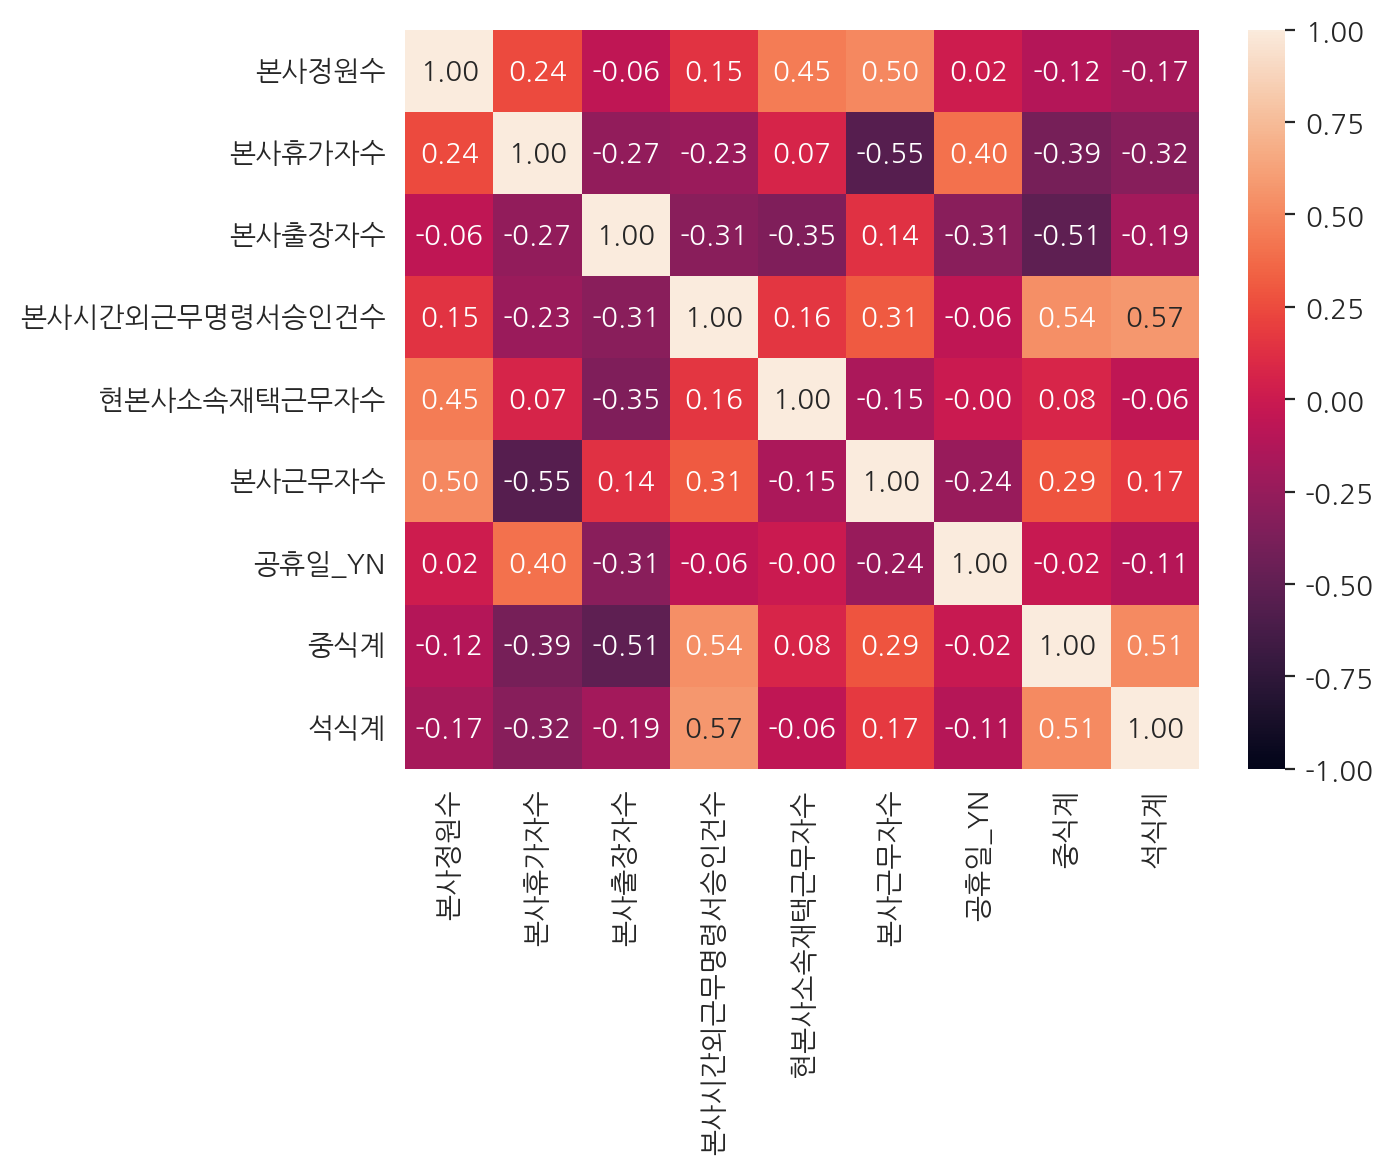

In [273]:
all_corr = all_holiday[['Î≥∏ÏÇ¨Ï†ïÏõêÏàò', 'Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò', 'Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò', 'Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò', 'ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò', 'Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò', 'Í≥µÌú¥Ïùº_YN', 'Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ']]

sns.heatmap(all_corr.corr(), annot =True, fmt = ',.2f', vmin = -1, vmax = 1);

#### Ï∂úÏû•ÏûêÏàò Í¥ÄÎ†®

#### Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò(ÏïºÍ∑ºÏûêÏàò) Í¥ÄÎ†®

In [274]:
# ÏàòÏöîÏùº ÏùºÎ∂ÄÍ∞Ä ÏûêÍ∏∞Í∞úÎ∞úÏùòÎÇ†Î°ú ÏïºÍ∑º ÏóÜÏùå
train[(train['Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò'] == 0) & (train['ÏÑùÏãùÍ≥Ñ'] == 0)].head(3)

ÏùºÏûê ÏöîÏùº  Î≥∏ÏÇ¨Ï†ïÏõêÏàò  Î≥∏ÏÇ¨Ìú¥Í∞ÄÏûêÏàò  Î≥∏ÏÇ¨Ï∂úÏû•ÏûêÏàò  Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò  ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò  \
204 2016-11-30  Ïàò   2689      68     207               0          0.0   
224 2016-12-28  Ïàò   2705     166     225               0          0.0   
244 2017-01-25  Ïàò   2697      79     203               0          0.0   

                                                  Ï§ëÏãùÎ©îÎâ¥  ÏÑùÏãùÎ©îÎâ¥     Ï§ëÏãùÍ≥Ñ  ...  \
204  ÎÇòÎ¨ºÎπÑÎπîÎ∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Í∞ÄÏØîÏò§Ïû•Íµ≠  ÏπòÌÇ®ÌïëÍ±∞*ÏöîÍ±∞Ìä∏D  Í∞êÏûêÏÉêÎü¨Îìú  Ïò§Î≥µÏßÄÎ¨¥Ïπ®  ...  None  1109.0  ...   
224  ÏΩ©ÎÇòÎ¨ºÎ∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) Í∞ÄÏØîÏò§Ïû•Íµ≠  ÎØ∏Ìä∏Î≥ºÏºÄÏ∞πÏ°∞Î¶º  ÍΩÉÎßõÏÇ¥ÏÉêÎü¨Îìú  Íµ∞Í≥†Íµ¨Îßà  Î∞∞Ï∂îÍ≤â...  None   767.0  ...   
244  Ïπ¥Î†àÎçÆÎ∞• (ÏåÄ:Íµ≠ÎÇ¥ÏÇ∞) ÎßëÏùÄÍµ≠  Ïú†Î¶∞Í∏∞  Í∞úÏÑ±Í∞êÏûêÎßåÎëê  Ïò§Ïù¥ÏÇ¨Í≥ºÎ¨¥Ïπ®  Ìè¨Í∏∞ÍπÄÏπò (ÍπÄ...  None   720.0  ...   

     ÎØ∏Ï∂úÍ∑ºÏûêÏàò  Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò      Ï§ëÏãùÏù¥Ïö©Î•†  ÏÑùÏãùÏù¥Ïö©Î•†  Ï§ëÏãùÎåÄÎπÑÏÑùÏãùÏù¥Ïö©Î•†     ÎÖÑ   Ïõî   Ïùº   Ï£º       ÎÖÑÏõî  
204  275.0  2414.0  45.940348    0.0        0.0  2016  11  30  48  2016-11  
224  391.0  2314.0  33.146067    0.0        0.0  2016  12  28  52  2016-12  
244  282.0  2415.0  29.813665    0.0        0.0  2017   1  25   4  2017-01  

[3 rows x 21 columns]

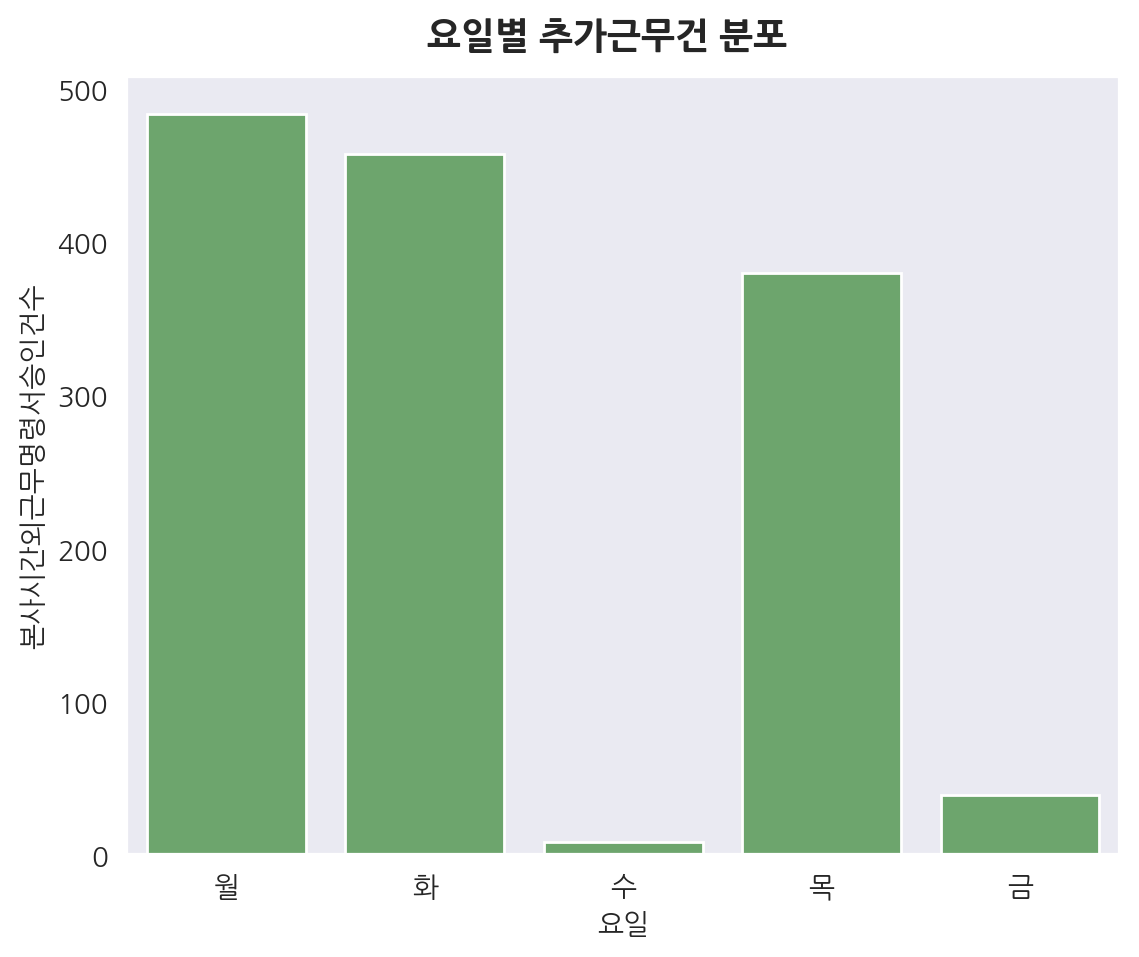

In [275]:
# ÏàòÏöîÏùºÏù¥ Í∑πÎã®Ï†ÅÏúºÎ°ú Ï†ÅÏùå
sns.barplot(train, x = 'ÏöîÏùº', y = 'Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò', color=green_code[1], errorbar=None);

plt.suptitle('ÏöîÏùºÎ≥Ñ Ï∂îÍ∞ÄÍ∑ºÎ¨¥Í±¥ Î∂ÑÌè¨', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.92)

ÏùºÏûê  Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò
652 2018-10-10            1044
894 2019-10-02             310
18  2016-03-02             261
2   2016-02-03             111
9   2016-02-17              23
..         ...             ...
505 2018-02-21               0
510 2018-02-28               0
514 2018-03-07               0
519 2018-03-14               0
677 2018-11-14               0

[239 rows x 2 columns]

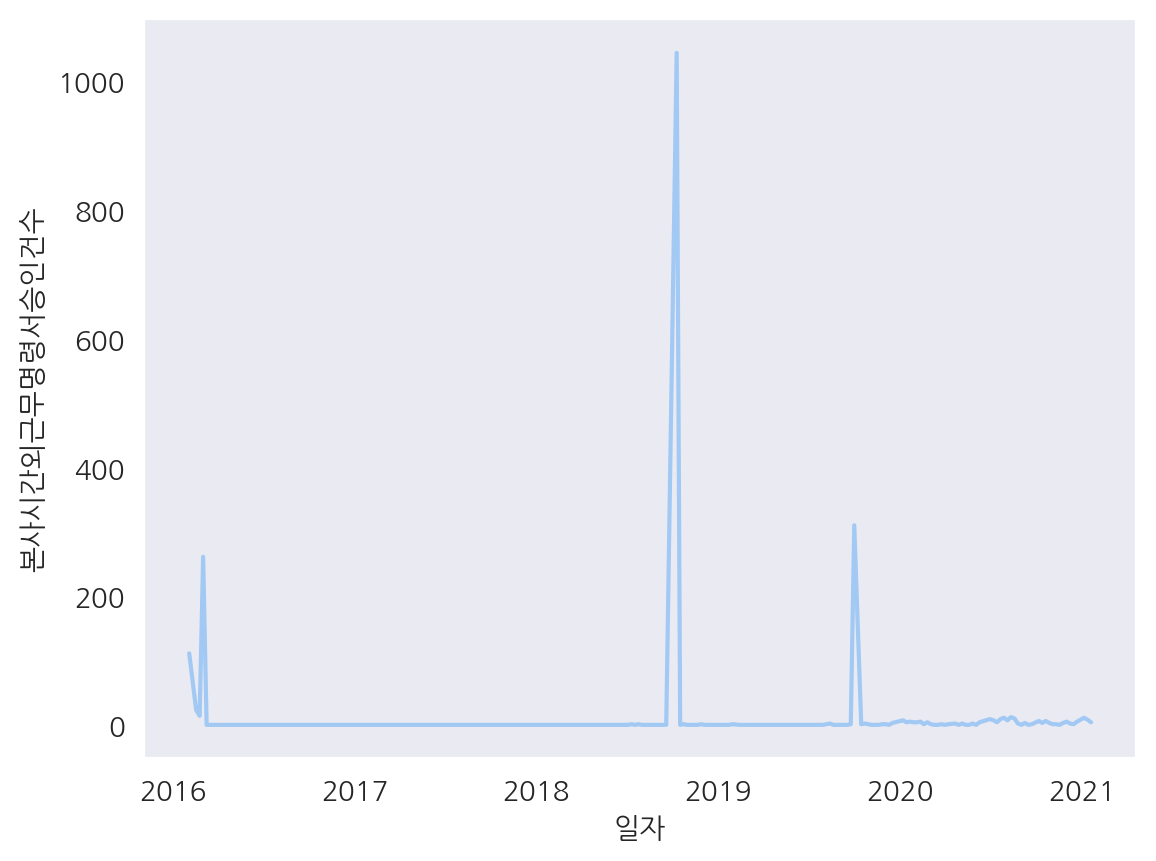

In [276]:
overwork_wed = train[train['ÏöîÏùº'] == 'Ïàò'][['ÏùºÏûê','Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò']]
display(overwork_wed.sort_values(by='Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò' ,ascending=False))
sns.lineplot(overwork_wed, x = 'ÏùºÏûê', y = 'Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò');

ÏùºÏûê  Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò
895  2019-10-04             428
171  2016-10-14             172
704  2018-12-21             163
206  2016-12-02             152
211  2016-12-09             152
...         ...             ...
806  2019-05-24               0
1084 2020-07-24               0
1089 2020-07-31               0
995  2020-02-28               0
811  2019-05-31               0

[241 rows x 2 columns]

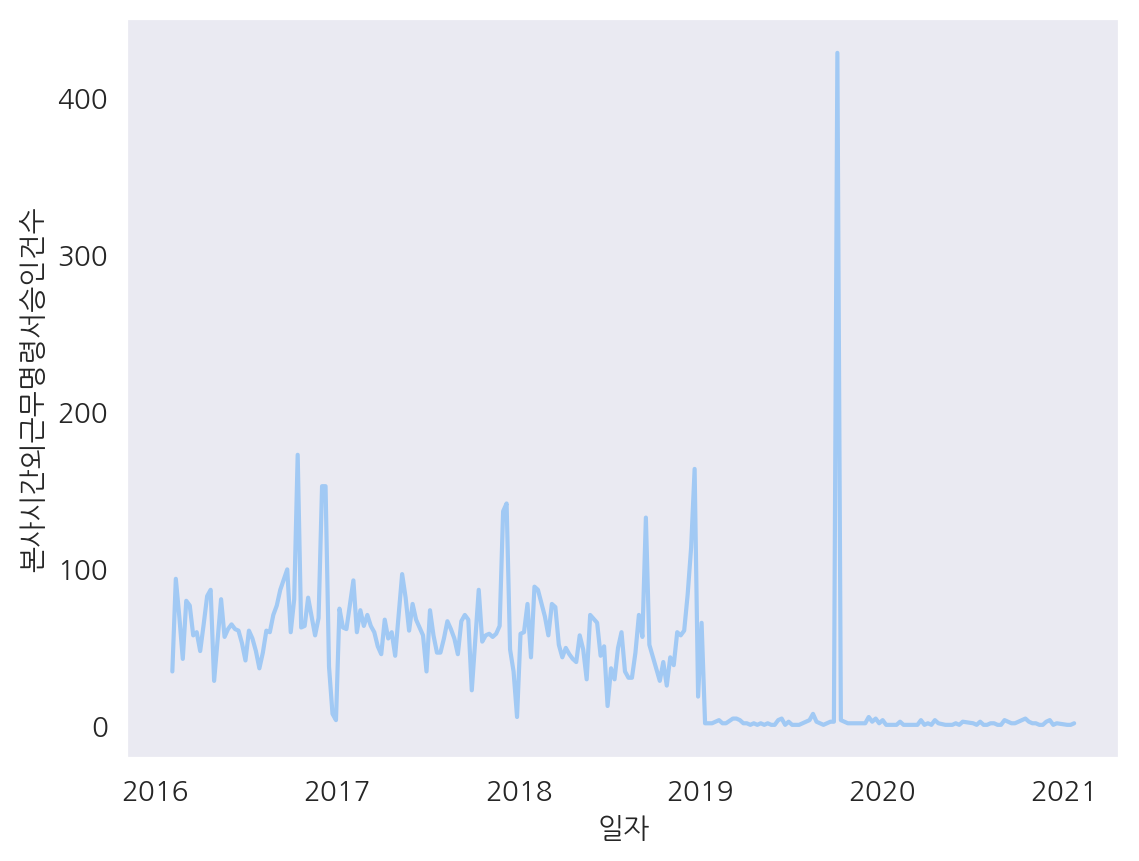

In [277]:
overwork_fri = train[train['ÏöîÏùº'] == 'Í∏à'][['ÏùºÏûê','Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò']]
display(overwork_fri.sort_values(by='Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò' ,ascending=False))
sns.lineplot(overwork_fri, x = 'ÏùºÏûê', y = 'Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò');

**Í∞ÄÏÑ§ : Ï∂îÍ∞ÄÍ∑ºÎ¨¥(Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏäπÏù∏Í±¥Ïàò)Í∞Ä ÎßéÏúºÎ©¥, ÏãùÏÇ¨ÌïòÎäî Ïù∏ÏõêÏù¥ ÎßéÏïÑÏßà Í≤ÉÏù¥Îã§.(ÌäπÌûà, ÏÑùÏãùÍ≥ÑÏùò Í≤ΩÏö∞)**
- ÌôïÏù∏ : 'Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏäπÏù∏Í±¥Ïàò'ÏôÄ Ï§ëÏãùÍ≥Ñ, ÏÑùÏãùÍ≥ÑÏùò Í¥ÄÍ≥ÑÎäî ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥ÏßÄÎßå Í∏∞ÎåÄÎßåÌÅº ÎÜíÏùÄ ÏàòÏπòÎäî ÏïÑÎãàÏóàÎã§.
- Ïú†ÏùòÎØ∏Ìïú ÏàòÏπòÎäî ÏïÑÎãàÏßÄÎßå ÎØ∏Ï∂úÍ∑ºÏûê ÏàòÍ∞Ä Ï§ëÏãùÍ≥ÑÏôÄ ÏÑùÏãùÍ≥ÑÏôÄÏùò Í¥ÄÍ≥ÑÏóêÏÑú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥ÏòÄÎã§.(Ï∂úÍ∑ºÏûê ÏàòÏôÄ ÎπÑÍµêÌïòÏó¨) ÌïòÏßÄÎßå Ïù¥Îäî ÏúÑÏùò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôîÎ•º Î≥¥ÏïòÏùÑ ÎïåÎÇò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Î≥¥ÏïòÏùÑ ÎïåÎÇò Ïú†ÏùòÎØ∏Ìïú ÏàòÏπòÎäî ÏïÑÎãàÎã§.
- ÎØ∏Ï∂úÍ∑ºÏûêÍ∞Ä ÎßéÏùÑÏàòÎ°ù Ï∂îÍ∞ÄÍ∑ºÎ¨¥ÏûêÏàòÍ∞Ä ÎßéÎã§Îäî Í≤ÉÏùÄ, Í∑∏ÎßåÌÅº ÎØ∏Ï∂úÍ∑ºÏûêÏùò Í≥µÎ∞±ÏùÑ Î©îÏö∞Í∏∞ ÏúÑÌï®Ïù∏ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

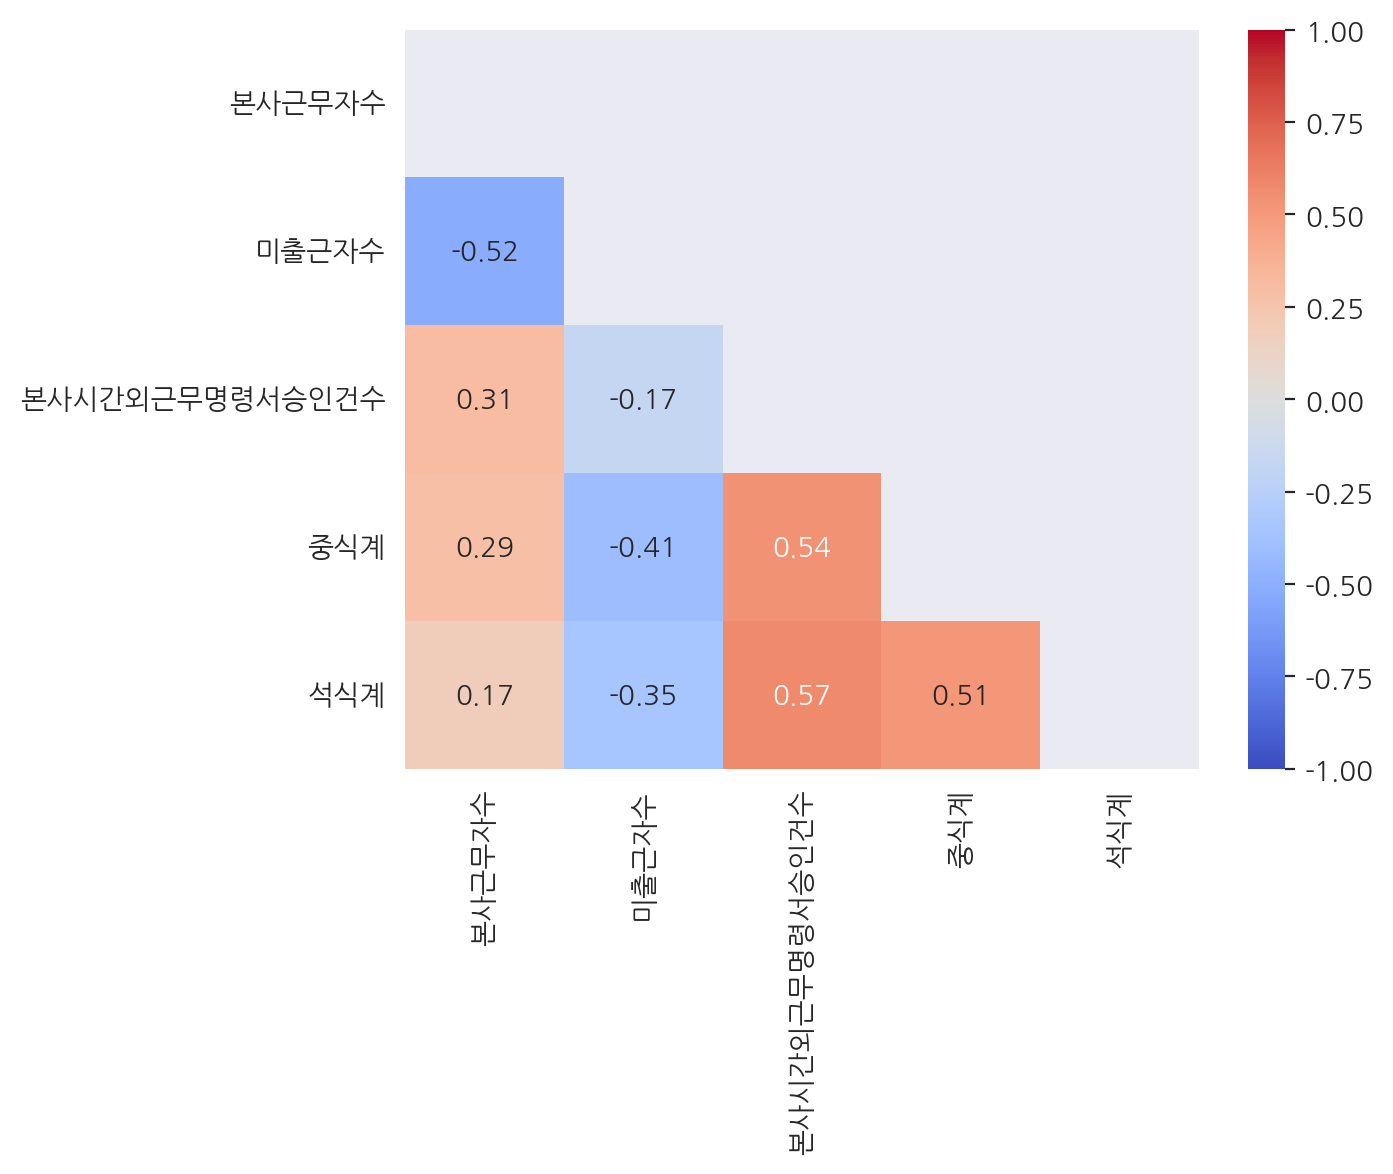

In [278]:
detail_corr = train[['Î≥∏ÏÇ¨Í∑ºÎ¨¥ÏûêÏàò', 'ÎØ∏Ï∂úÍ∑ºÏûêÏàò', 'Î≥∏ÏÇ¨ÏãúÍ∞ÑÏô∏Í∑ºÎ¨¥Î™ÖÎ†πÏÑúÏäπÏù∏Í±¥Ïàò', 'Ï§ëÏãùÍ≥Ñ', 'ÏÑùÏãùÍ≥Ñ']].corr()
mask = np.triu(np.ones_like(detail_corr))

sns.heatmap(detail_corr,
            annot=True,
            vmin=-1, vmax=1,
            cmap='coolwarm',
            mask=mask);

#### ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò Í¥ÄÎ†®

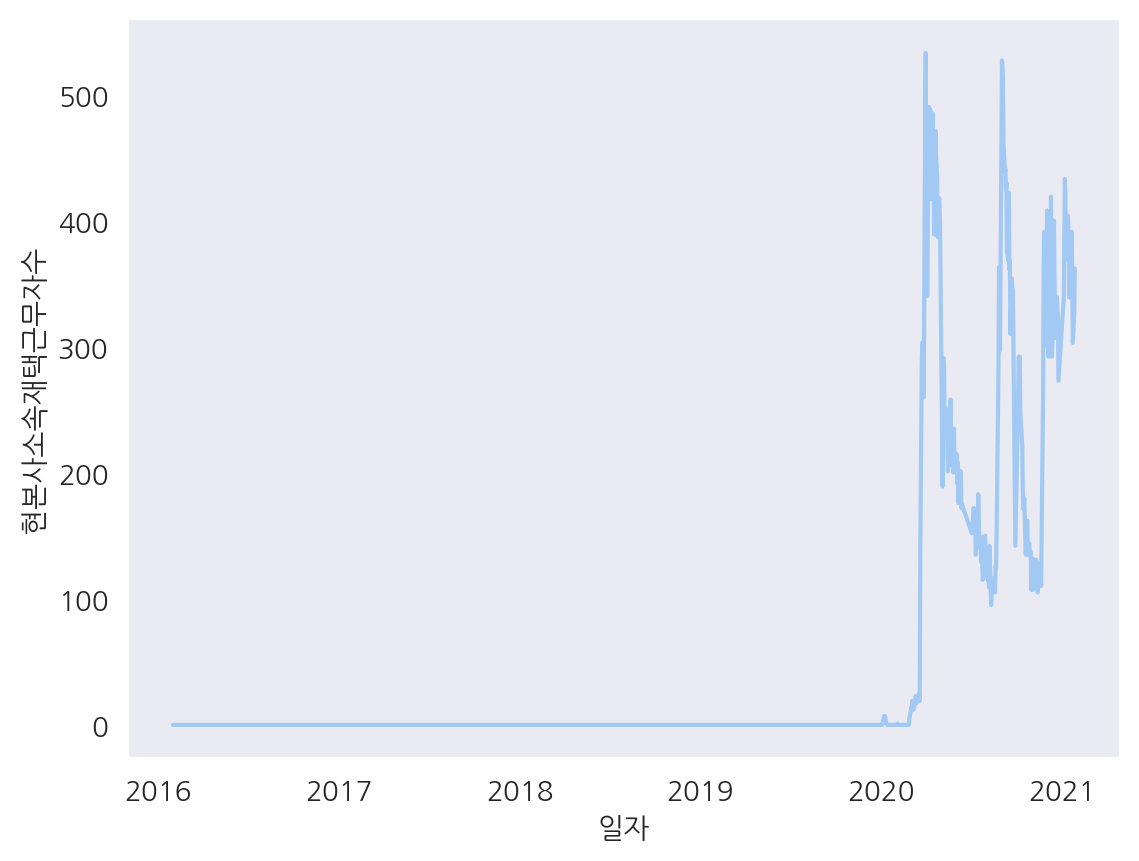

In [279]:
sns.lineplot(train, x = 'ÏùºÏûê', y = 'ÌòÑÎ≥∏ÏÇ¨ÏÜåÏÜçÏû¨ÌÉùÍ∑ºÎ¨¥ÏûêÏàò');